In [1]:
%matplotlib nbagg
%load_ext line_profiler

In [2]:
import jefimenko
import numpy as np
import pdb
import mpld3
mpld3.enable_notebook()

Jefimenko version 0.0.6
Julia


In [3]:
# %load_ext line_profiler

In [4]:
%load_ext memory_profiler

In [5]:
C_0 = 299792458
K_e = 8.9875517873681764 * 10**9
E_0 = (4 * np.pi * K_e) ** -1
U_0 = (C_0 ** 2 * E_0) ** -1

In [6]:
def print_specs(mapping):
    
    for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
        jefimenko.plot_EM_grid('H', mapping, time=t)

    print('conductors')
    for i in range(len(mapping.conductors)):
            print(mapping.conductors[i].location)

    jefimenko.plot_grid(mapping)
    # for t in range(10):

    for t in range(len(mapping.currents)):
        if len(mapping.currents[t]) != 0:
            print('at time = ' + str(t))
            print('currents')
            for i in range(len(mapping.currents[t])):
                print(mapping.currents[t][i].amps)
                print(mapping.currents[t][i].direction)
                #if len(mapping.conductors) != 0:
                #    print(mapping.currents[t][mapping.conductors[0].current].amps)
                #    print(mapping.currents[t][mapping.conductors[0].current].direction)
            print('')
    
    for t in range(len(mapping.charges)):
        if len(mapping.charges[t]) != 0:
            print('charges at time = ' + str(t))
            print('charges')
            #for i in range(len(mapping.charges[t])):
            for i in range(len(mapping.charges[t])):
                print("the charge number is " + str(i))
                print(mapping.charges[t][i].Q)
            print('')
    
    for t in range(len(mapping.grid['E'])):
        print('at time = ' + str(t))
        print('the E field is:')
        #field = jefimenko.print_location(mapping.grid['H'][T], [1], mapping)
        #print(field)
        print(mapping.grid['E'][t])
        print('')
        
    for t in range(len(mapping.grid['H'])):
        print('at time = ' + str(t))
        print('the H field is:')
        #field = jefimenko.print_location(mapping.grid['H'][T], [1], mapping)
        #print(field)
        print(mapping.grid['H'][t])
        print('this makes the B field')
        print(U_0 * mapping.grid['H'][t])
        print('')
    print()
    
    #print(mapping.charges[0].location)
   # for t in range(len(mapping.grid['E'])):
   #     print("this should be the free charge")
   #     print(mapping.charges[t][0].Q)
    

    #for i in range(len(mapping.conductors)):
        #print("this is for conductor " + str(i))
        #print(mapping.conductors[i].charges)

In [7]:
def constant_field(print_all=False):
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[2,2,2],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
                constant_E=[11,12,13],
                constant_H=[21,22,23]
        )
    E_pass = 0
    E_fail = 0
    H_pass = 0
    H_fail = 0

    jefimenko.simulate(mapping)
    for t in range(len(mapping.grid['E'])):
        for i in np.ndindex(tuple((2,2,2))):
            if all( [A == B for A, B in zip(mapping.grid['E'][t][i[0]][i[1]][i[2]], [11, 12, 13])]):
            # if (mapping.grid['E'][i[0]][i[1]][i[2]] == [11, 12, 13]).all():
                E_pass += 1
            else:
                print('Fail E value is ')
                print(mapping.grid['E'][t][i[0]][i[1]][i[2]])
                E_fail += 1

            if all( [A == B for A, B in zip(mapping.grid['H'][t][i[0]][i[1]][i[2]], [21, 22, 23])]):
                H_pass += 1
            else:
                H_fail +=1
                print('Fail H value is ')
                print(mapping.grid['H'][t][i[0]][i[1]][i[2]])
    
    score = [E_pass, E_fail, H_pass, H_fail]
    return(score)


In [8]:
score = constant_field()
print(score)

print('E field pass count is ' + str(score[0]))
print('E field fail count is ' + str(score[1]))
print('H field pass count is ' + str(score[2]))
print('H field fail count is ' + str(score[3]))

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 1.008e-08 seconds
each time step will be 3.36e-09
the simulation will be composed of 3 time steps
percent compleat = 100 estemated time remaining 0 seconds              
[24, 0, 24, 0]
E field pass count is 24
E field fail count is 0
H field pass count is 24
H field fail count is 0


In [9]:
def constant_E_H_field(print_all=False):
    
    time_L = 3
    delta_t = 1
    E_field = [1, 0, 0]
    H_field = [0, 0, 5]
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=E_field,
                constant_H=H_field
        )
    jefimenko.simulate(mapping)
    E_pass = 0
    E_fail = 0
    H_pass = 0
    H_fail = 0

    
    size = len(mapping.grid['E']) - 1
    size2 = len(mapping.grid['E'][0]) - 1
    size3 = len(mapping.grid['E'][0][0]) - 1
    
    for t in range(len(mapping.grid['E'])):
        for i in np.ndindex(tuple((size, size2, size3))):

            if mapping.grid['E'][t][i[0]][i[1]][i[2]] == E_field:
            # if (mapping.grid['E'][i[0]][i[1]][i[2]] == [11, 12, 13]).all():
                E_pass += 1
            else:
                E_fail += 1

            if mapping.grid['H'][t][i[0]][i[1]][i[2]] == H_field:
                H_pass += 1
            else:
                H_fail += 1
    
    score = [E_pass, E_fail, H_pass, H_fail]
    return(score)


In [10]:
pass_score = constant_E_H_field()
print('E_field pass = ' + str(pass_score[0]))
print('E_field fail = ' + str(pass_score[1]))
print('H_field pass = ' + str(pass_score[2]))
print('H_field fail = ' + str(pass_score[3]))

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 3 seconds
each time step will be 1
the simulation will be composed of 3 time steps
percent compleat = 100 estemated time remaining 0 seconds              
E_field pass = 486
E_field fail = 0
H_field pass = 486
H_field fail = 0


In [11]:
def constant_field(print_all=False):
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[2,2,2],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
                constant_E=[11,12,13],
                constant_H=[21,22,23]
        )
    E_pass = 0
    E_fail = 0
    H_pass = 0
    H_fail = 0

    jefimenko.simulate(mapping)
    for t in range(len(mapping.grid['E'])):
        for i in np.ndindex(tuple((2,2,2))):
            if all( [A == B for A, B in zip(mapping.grid['E'][t][i[0]][i[1]][i[2]], [11, 12, 13])]):
            # if (mapping.grid['E'][i[0]][i[1]][i[2]] == [11, 12, 13]).all():
                E_pass += 1
            else:
                E_fail += 1

            if all( [A == B for A, B in zip(mapping.grid['H'][t][i[0]][i[1]][i[2]], [21, 22, 23])]):
                H_pass += 1
            else:
                H_fail += 1
    
    score = [E_pass, E_fail, H_pass, H_fail]
    return(score)


In [12]:
def constant_field(print_all=False):
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[2,2,2],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
                constant_E=[11,12,13],
                constant_H=[21,22,23]
        )
    E_pass = 0
    E_fail = 0
    H_pass = 0
    H_fail = 0

    jefimenko.simulate(mapping)
    for t in range(len(mapping.grid['E'])):
        for i in np.ndindex(tuple((2,2,2))):
            if all( [A == B for A, B in zip(mapping.grid['E'][t][i[0]][i[1]][i[2]], [11, 12, 13])]):
            # if (mapping.grid['E'][i[0]][i[1]][i[2]] == [11, 12, 13]).all():
                E_pass += 1
            else:
                E_fail += 1

            if all( [A == B for A, B in zip(mapping.grid['H'][t][i[0]][i[1]][i[2]], [21, 22, 23])]):
                H_pass += 1
            else:
                H_fail += 1
    
    score = [E_pass, E_fail, H_pass, H_fail]
    return(score)


In [13]:
def test_charge_1(print_all=False):
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                # size=[10, 1, 1],  # this is the size of the grid in meters
                size=[4, 1, 1],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
        )
    pass_count_E = 0
    pass_count_H = 0
    fail_count_E  = 0
    fail_count_H  = 0
 

    count = mapping.Add_Charge([0,0,0], Q = 1, count=True)
    
    if print_all is True:
        print("charge_count is " + str(count))

        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    for t in range(4):
        jefimenko.plot_EM_grid('E', mapping, time = t)

    #if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
    if(mapping.grid['E'][0][1][0][0] == [0, 0, 0]):
        if print_all == True:
            print("time == 0 R == 1 E field PASS")
            print(mapping.grid['E'][0][1][0][0])
            print()
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time = 0 R == 1 E field FAIL")
            print(mapping.grid['E'][0][1][0][0])
            print()
        fail_count_E = fail_count_E + 1

    if mapping.grid['H'][0][1][0][0] == [0, 0, 0]:
        if print_all == True:
            print("time == 0 R == 1 H field PASS")
            print(mapping.grid['H'][0][1][0][0])
            print()
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 0 R == 1 H field FAIL")
            print(mapping.grid['H'][0][1][0][0])
            print()
        fail_count_H = fail_count_H + 1

    test_array = [8987551787.368176, 0, 0]

    if all([abs(M - T) <.01 for (M, T) in zip(mapping.grid['E'][1][1][0][0], test_array)]):
        if print_all == True:

            # percent = (np.linalg.norm(mapping.grid['E'][1][1][0][0] - 8987551787.368176) / 8987551787.368176)

            percent = [(E - 8987551787.368176) / 8987551787.368176 for E in mapping.grid['E'][1][1][0][0] ]
            percent = np.linalg.norm(percent)
            print("time == 1 R == 1 E field PASS")
            print(mapping.grid['E'][1][1][0][0])
            print()
        pass_count_E = pass_count_E + 1
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        if print_all == True:
            print("time == 1 R == 1 E field FAIL")   
            print(mapping.grid['E'][1][1][0][0])
            print('target valu')
            print(test_array)
            print()
        fail_count_E = fail_count_E + 1

    test_array = [2246887946.842, 0, 0]
    if all([abs(E - T) < .01 for (E,T) in zip(mapping.grid['E'][2][2][0][0], test_array)]):
        if print_all == True:
            print("time == 1 R == 2 E field PASS")
            print(mapping.grid['E'][2][2][0][0])
            print()
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time == 1 R == 2 E field FAIL")
            print(mapping.grid['E'][2][2][0][0])
            print('target valu')
            print(test_array)
            print()
        fail_count_E = fail_count_E + 1
        
    if all([H == (0,) for H in zip(mapping.grid['H'][1][1][0][0])]):
        if print_all == True:
            print("time == 1 R == 1 H field PASS")
            print(mapping.grid['H'][1][1][0][0])
            print()
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 1 R == 1 H field FAIL")
            print(mapping.grid['H'][1][1][0][0])
            print()
        fail_count_H = fail_count_H + 1
    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('E', mapping, time=t)

    #field = jefimenko.print_location(mapping.grid['E'][1], [1, 0], mapping)
    #print(field)
    #jefimenko.plot_EM_grid('E', mapping, time=9)

In [14]:
# print(test_charge_1(print_all = True))

In [15]:
def test_charge_1(print_all=False):
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                size=[10, 1, 1],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
        )
    pass_count_E = 0
    pass_count_H = 0
    fail_count_E  = 0
    fail_count_H  = 0
 

    count = mapping.Add_Charge([0], Q = 1, count=True)
    
    if print_all is True:
        print("charge_count is " + str(count))

        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)
    
    for t in range(4):
        jefimenko.plot_EM_grid('E', mapping, time = t)

    #if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
    if mapping.grid['E'][0][1][0][0] == [0, 0, 0]:
        if print_all == True:
            print("time == 0 R == 1 E field PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time = 0 R == 1 E field FAIL")
        fail_count_E = fail_count_E + 1

    if mapping.grid['H'][0][1][0][0] == [0, 0, 0]:
        if print_all == True:
            print("time == 0 R == 1 H field PASS")
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 0 R == 1 H field FAIL")
        fail_count_H = Fail_count_H + 1

    test_array = [8987551787.368176, 0, 0]

    if ([E - T < .01 for (E, T) in zip(mapping.grid['E'][1][1][0][0], test_array)]):
        if print_all == True:
            percent = (np.linalg.norm([E - 8987551787.368176 for (E) in mapping.grid['E'][1][1][0][0]])
                       / 8987551787.368176)
            print("time == 1 R == 1 E filed PASS")
        pass_count_E = pass_count_E + 1
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        if print_all == True:
            print("time == 0 R == 1 E field FAIL")   
        fail_count_E = fail_count_E + 1

    test_array = [2246887946.842, 0, 0]

    if ([E - T < .01 for (E, T) in zip(mapping.grid['E'][1][2][0][0], test_array)]):
        if print_all == True:
            print("time == 1 R == 2 E field PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time == 1 R == 2 E field FAIL")
            print(mapping.grid['E'][1][2][0][0])
        fail_count_E = fail_count_E + 1
        
    if all([H == 0 for (H) in mapping.grid['H'][1][1][0][0] ]):
        if print_all == True:
            print(mapping.grid['H'][1][1][0][0])
            print("time == 1 R == 1 H field PASS")
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print(mapping.grid['H'][1][1][0][0])
            print("time == 1 R == 1 H field FAIL")
        fail_count_H = fail_count_H + 1
    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('E', mapping, time=t)

    #field = jefimenko.print_location(mapping.grid['E'][1], [1, 0], mapping)
    #print(field)
    #jefimenko.plot_EM_grid('E', mapping, time=9)
    
    return([pass_count_E, fail_count_E, pass_count_H, fail_count_H], mapping)

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 3.36e-08 seconds
each time step will be 3.36e-09
the simulation will be composed of 10 time steps
charge_count is 0
this is the grid layout


<IPython.core.display.Javascript object>


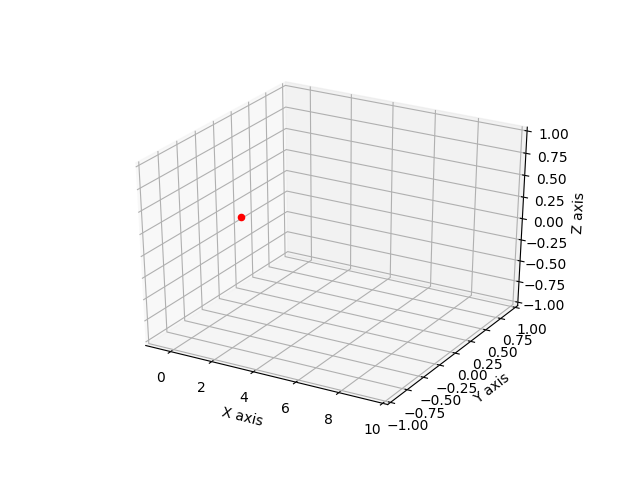

shape = 3
percent compleat = 100 estemated time remaining 0 seconds              


<IPython.core.display.Javascript object>


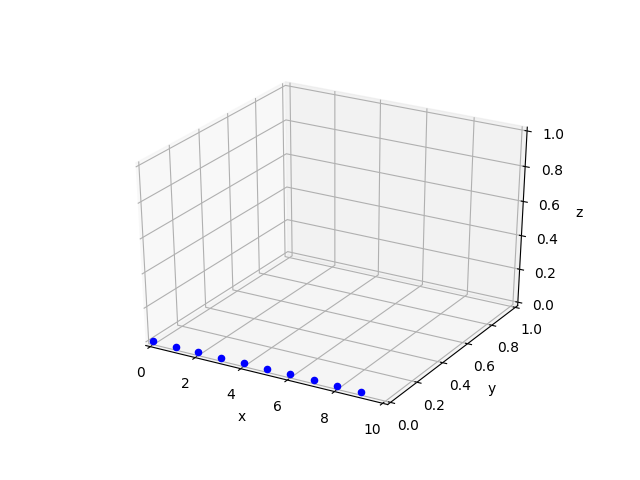

The acutal time is 0.0


<IPython.core.display.Javascript object>


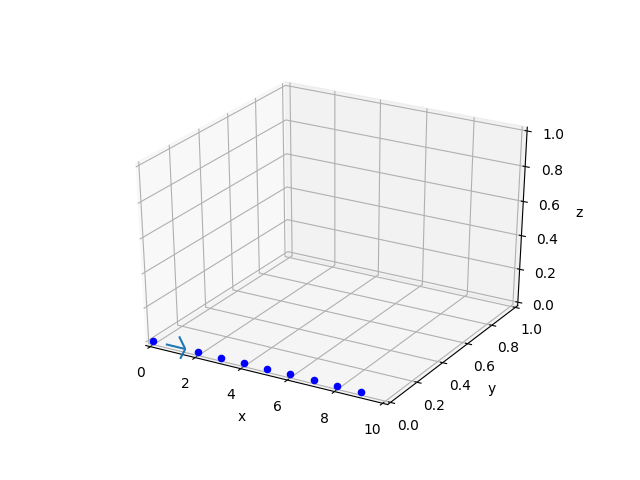

The acutal time is 3.36e-09


<IPython.core.display.Javascript object>


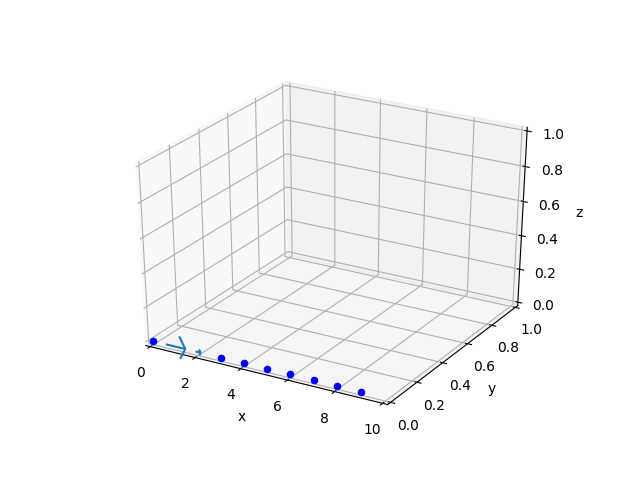

The acutal time is 6.72e-09


<IPython.core.display.Javascript object>


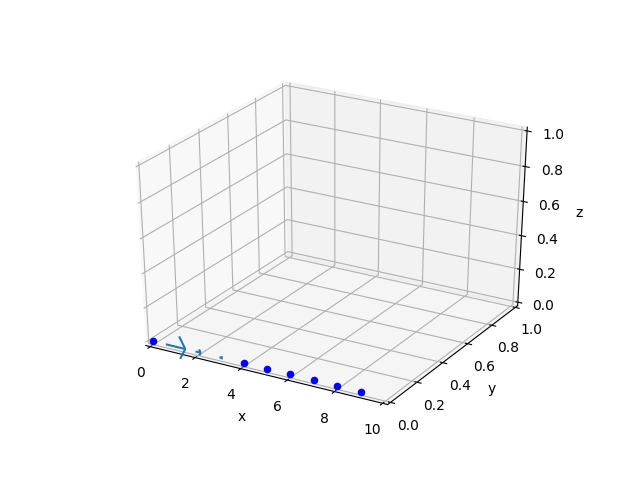

The acutal time is 1.008e-08
time == 0 R == 1 E field PASS
time == 0 R == 1 H field PASS
time == 1 R == 1 E filed PASS
time == 1 R == 2 E field PASS
[0.0, 0.0, 0.0]
time == 1 R == 1 H field PASS
E pass count = 3
E fail count = 0
H pass count = 2
H fail count = 0


In [16]:
#%%time

# %prun count, charge_1 = test_charge_1(print_all=False)

# %memit count, charge_1 = test_charge_1(print_all=False)
count, charge_1 = test_charge_1(print_all=True)

# grid simulated in 0.033782958984375 seconds without cython

#%mprun -f test_charge_1 count, charge_1 = test_charge_1(print_all=False)
#count, charge_1 = test_charge_1(print_all=False)
print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))


In [17]:
def test_current_1(print_all=False):
    time = 3
    time = 10
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,1,1],  # this is the size of the grid in meters
                time=time * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    H_pass = 0
    H_fail = 0
    mapping.Add_Current([0, 0, 0],
                    direction=[0, 0, 1],
                    Amps=1)
                    #Amps=1/(np.linalg.norm(mapping.delta)))


    U_0 = jefimenko.U_0

    for i in range(len(mapping.currents[0])):
        if print_all == True:
            print('amps = ' + str(mapping.currents[0][i].amps))
            print('direction = ' + str(mapping.currents[0][i].direction))
            print('location = '+ str(mapping.currents[0][i].location))
            print('')
    jefimenko.simulate(mapping)

    if print_all == True:
        jefimenko.plot_grid(mapping)

    if print_all == True:
        print(' The H field is ')
        for t in range(int(mapping.time/mapping.delta_t)):
            # jefimenko.plot_grid(mapping, time = t)
            jefimenko.plot_EM_grid('H', mapping, time=t)
 
        print(' The E field is ')
        for t in range(int(mapping.time/mapping.delta_t)):
            # jefimenko.plot_grid(mapping, time = t)
            jefimenko.plot_EM_grid('E', mapping, time=t)
    
    
    if mapping.grid['H'][0][1][0][0] == [0, 0, 0]:
        H_pass = H_pass + 1
        if print_all == True:
            print("time == 0 PASS")
            print()
    else:
        if print_all == True:
            print("time == 0 Fail")
            print()
    test_array = [0, 2*10**-7, 0]


    percent = abs((np.linalg.norm(U_0 * np.array(mapping.grid['H'][1][1][0][0]) - np.array(test_array)) / (2*10**-7)) * 100)

    if percent <= 1:
        H_pass = H_pass + 1
        if print_all == True:
            print("time == 1 R == 1 PASS")
            print()
    else:
        H_fail = H_fail + 1
        print("H field is within " + str( percent) + " percent at time = 1")
        print("time = 1 FAIL")
        print('H_field is ')
        print(mapping.grid['H'][1][1][0][0])
        print('target is')
        print(test_array)
        print('test difference')
        print((mapping.grid['H'][1][1][0][0][1] - test_array[1]))
        print((mapping.grid['H'][1][1][0][0][1] - test_array[1]) / test_array[1])
        print('')

    test_array = [0, 1*10**-7, 0]

    percent = abs((np.linalg.norm(U_0 * np.array(mapping.grid['H'][2][2][0][0]) - np.array(test_array)) / (1*10**-7)) * 100)
    if percent <= 1:
        H_pass = H_pass + 1
        print("time == 2 R == 2 PASS")
        print()
    else:
        H_fail = H_fail + 1
        print("H field is within " + str( percent) + " percent at time = 2 R == 2")
        print("time = 2 FAIL")
        print('H_field is ')
        print([U_0 * H for H in mapping.grid['H'][2][2][0][0]])   
        print('target is')
        print(test_array)
        print('the diffrence is')
        print([H - T for (H,T) in zip(mapping.grid['H'][2][2][0][0], test_array)])
        print('test difference')
        print((mapping.grid['H'][2][2][0][0][1] - test_array[1]))
        print((mapping.grid['H'][2][2][0][0][1] - test_array[1]) / test_array[1])
        print('')
        
    if print_all is True:
        print(np.array(mapping.grid['H']))
    return([H_pass, H_fail])

In [18]:
# %time
# %memit
score = test_current_1(print_all = False)
#grid simulated in 0.006738424301147461 seconds without cython

print('H pass score = ' + str(score[0]))
print('H fail score = ' + str(score[1]))

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 3.36e-08 seconds
each time step will be 3.36e-09
the simulation will be composed of 10 time steps
percent compleat = 100 estemated time remaining 0 seconds              
time == 2 R == 2 PASS

H pass score = 3
H fail score = 0


In [19]:
# pdb.pm()

In [20]:
def test_current_2(print_all=True):
    # time = 99
    time = 50
    #r = 10
    r = 50

    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z
                size=[r + 1, 1, 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9
    mapping.Add_Current([0, 0, 0],
                    direction=[0, 1, 0],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    #jefimenko.plot_grid(mapping)

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w))

    #for t in range(len(mapping.currents)):
    #    for i in range(len(mapping.currents[t])):
    #        print('amps = ' + str(mapping.currents[t][i].amps))
    #        print('direction = ' + str(mapping.currents[t][i].direction))
    #        print('location = '+ str(mapping.currents[t][i].location))
    #        print('')

    jefimenko.simulate(mapping)

    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('H', mapping, time=t)

    #for t in range(mapping.time_size):
    ##for t in range(10):
    #    jefimenko.plot_EM_grid('H', mapping, time=t)

    if print_all == True:
#        jefimenko.plot_EM_grid('H', mapping, time=time-1)
        for t in range(0, time-1, 10):
            print('time is ' + str(t))
            jefimenko.plot_EM_grid('H', mapping, time=t)
            jefimenko.plot_EM_grid('E', mapping, time=t)
        

    
    for test_time in range(time + 1):
        for test_r in range(1, test_time):

            test_array_E_1 = [0,- I_0 * w * np.cos(w * (test_time - test_r / C_0)) / (4 * np.pi * E_0 * test_r * C_0**2), 0 ]
            test_array_E_2 = [0, -I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) / (test_r**2 * E_0 * 2 * np.pi * C_0), 0]
            
            test_array_E = [test_array_E_1[0] + test_array_E_2[0], test_array_E_1[1] + test_array_E_2[1], test_array_E_1[2] + test_array_E_2[2]]

            test_array_H_1 = [0, 0, - 1 * I_0 * w *
                              np.cos(w * (test_time * delta_t - test_r / C_0)) / (4 * np.pi * test_r * C_0)]
            test_array_H_2 = [0, 0, - scale * I_0 *
                              np.sin(w * (test_time * delta_t - test_r / C_0)) * 2 / test_r ]

            test_array_H = [test_array_H_1[0] + test_array_H_2[0],
                            test_array_H_1[1] + test_array_H_2[1], test_array_H_1[2] + test_array_H_2[2]]

         #   percent_E = (abs((np.linalg.norm([E - T for (E, T) in
         #                                     zip(mapping.grid['E'][test_time][test_r][0][0], test_array_E)]) /
         #                     np.linalg.norm(test_array_E)) * 100))

         #   percent_H = (abs((np.linalg.norm([H - T for (H,T) in
         #                                    zip(mapping.grid['H'][test_time][test_r][0][0], test_array_H)]) /
         #                    np.linalg.norm(test_array_H)) * 100))

            percent_E = abs((np.linalg.norm(np.array(mapping.grid['E'][test_time][test_r][0][0]) - test_array_E) / np.linalg.norm(test_array_E)) * 100)
            percent_H = abs((np.linalg.norm(np.array(mapping.grid['H'][test_time][test_r][0][0]) - test_array_H) / np.linalg.norm(test_array_H)) * 100)

            if percent_E <= 5:
                pass_count_E  = pass_count_E + 1

            else:
                fail_count_E = fail_count_E + 1
                if print_all == True:
                    print('E_field')
                    print(str(mapping.grid['E'][test_time][test_r][0][0]))
                    print('target E_field')
                    print(str(test_array_E))
                    print('test time is ' + str(test_time))
                    print('test r is    ' + str(test_r))
                    print('')

            if percent_H <= 5:
                pass_count  = pass_count + 1

            else:
                fail_count = fail_count + 1
                if print_all == True:
                    
                    print('H_field')
                    print(str(mapping.grid['H'][test_time][test_r][0][0]))
                    print('target H_field')
                    print(str(test_array_H))
                    print('test time is ' + str(test_time))
                    print('test r is    ' + str(test_r))
                    print('')

    if print_all == True:
        print('E field pass count = ' + str(pass_count_E))
        print('E field fail count = ' + str(fail_count_E))
    if print_all == True:
        if fail_count_E < 120:
            print('this is curently exseptable')
    
    if print_all == True:
        print() 
        print('H field pass count = ' + str(pass_count))
        print('H field fail count = ' + str(fail_count))
    if print_all == True:
        if fail_count < 120:
            print('this is curently exseptable')

    print(np.array(mapping.grid['H']))
    return([pass_count_E, fail_count_E, pass_count, fail_count])
    

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 1.7136e-07 seconds
each time step will be 3.36e-09
the simulation will be composed of 51 time steps
percent compleat = 100 estemated time remaining 0 seconds              
time is 0


<IPython.core.display.Javascript object>


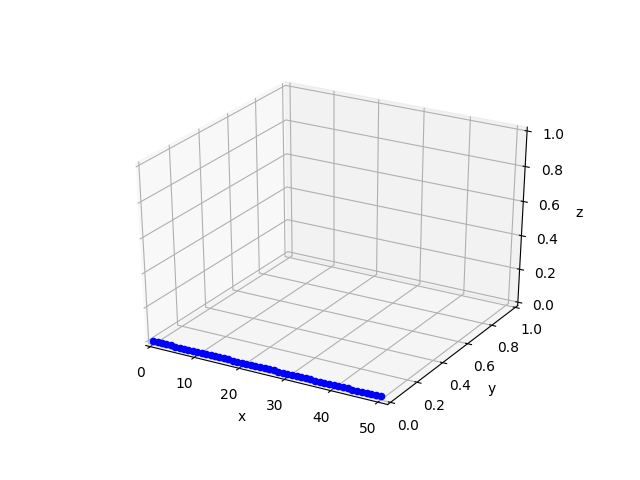

The acutal time is 0.0


<IPython.core.display.Javascript object>


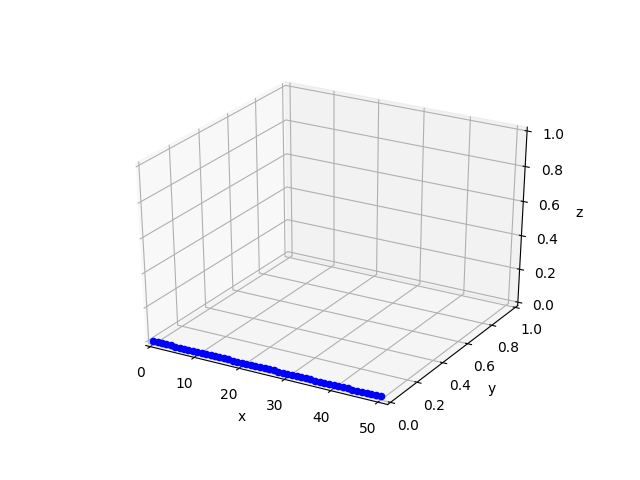

The acutal time is 0.0
time is 10


<IPython.core.display.Javascript object>


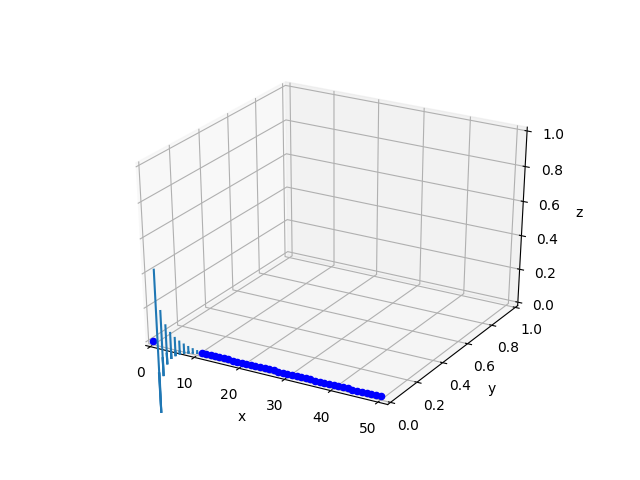

The acutal time is 3.3599999999999996e-08


<IPython.core.display.Javascript object>


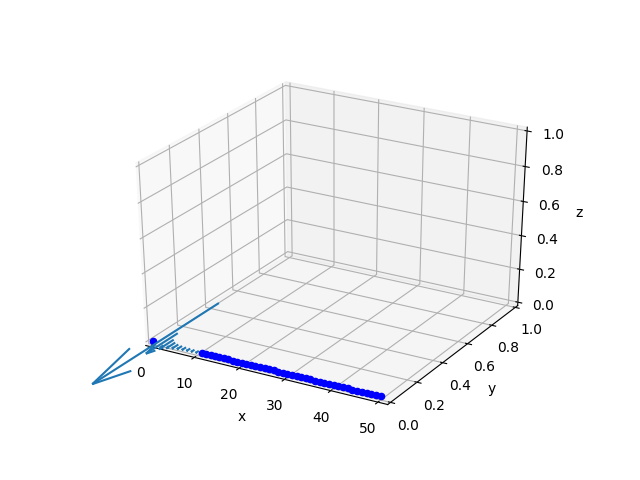

The acutal time is 3.3599999999999996e-08
time is 20


<IPython.core.display.Javascript object>


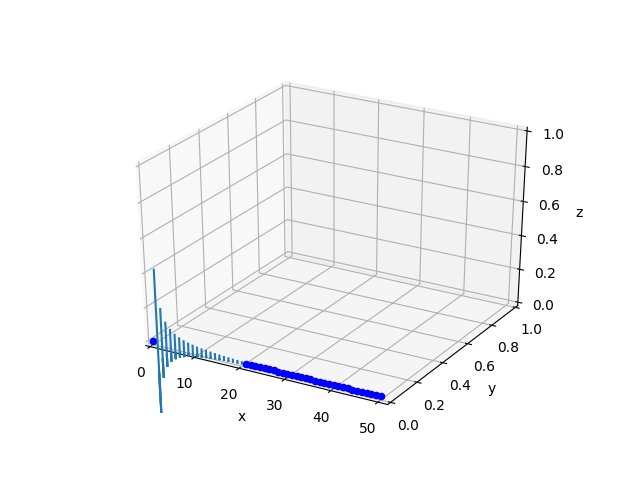

The acutal time is 6.719999999999999e-08


<IPython.core.display.Javascript object>


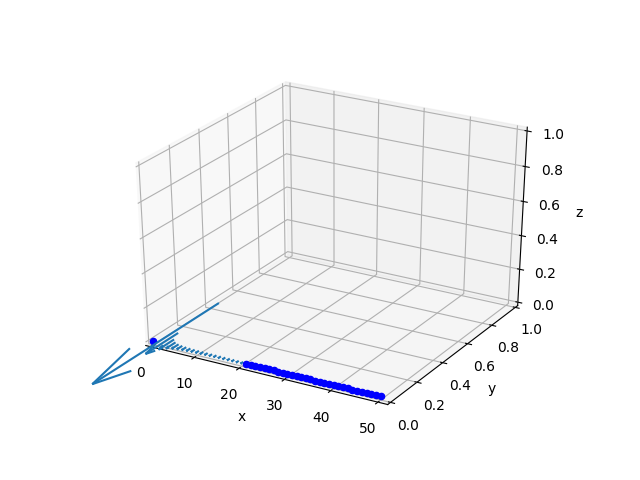

The acutal time is 6.719999999999999e-08
time is 30


<IPython.core.display.Javascript object>


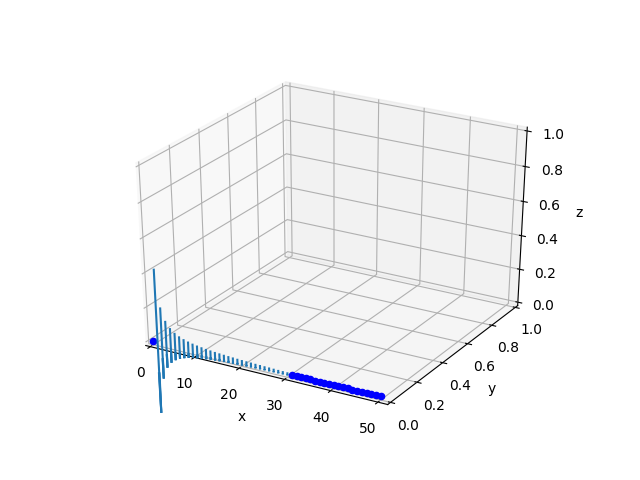

The acutal time is 1.008e-07


<IPython.core.display.Javascript object>


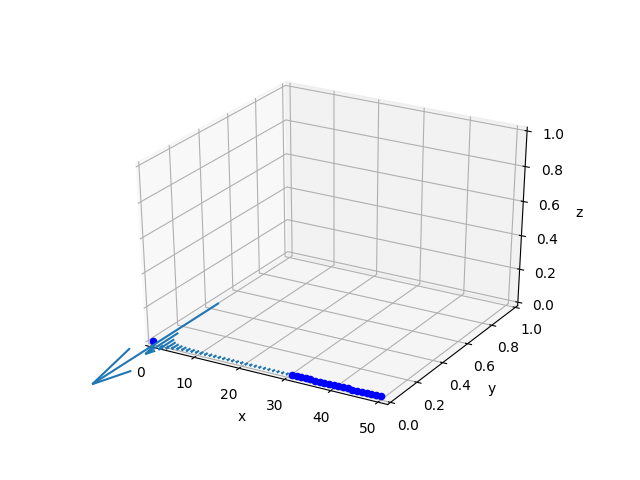

The acutal time is 1.008e-07
time is 40


<IPython.core.display.Javascript object>


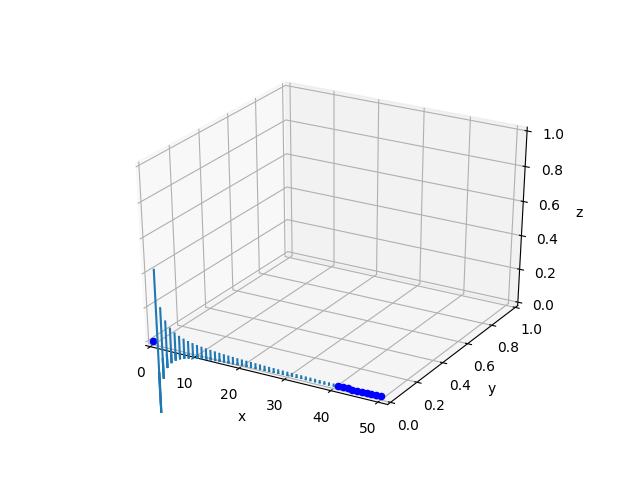

The acutal time is 1.3439999999999999e-07


<IPython.core.display.Javascript object>


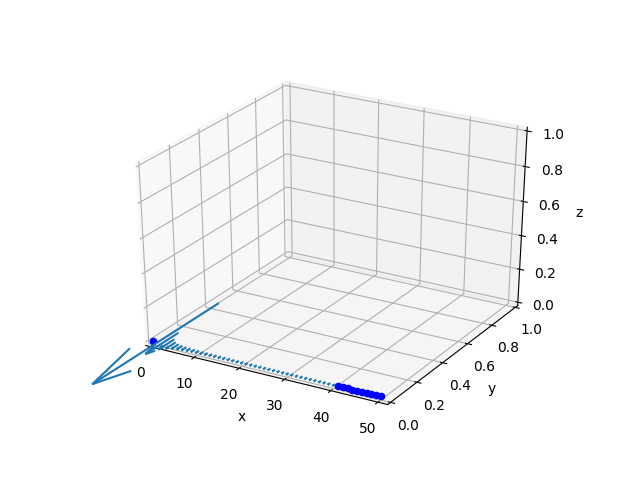

The acutal time is 1.3439999999999999e-07
H_field
[0.0, 0.0, -4.5707458872643274e-10]
target H_field
[0, 0, -4.81433636744912e-10]
test time is 12
test r is    11

H_field
[0.0, 0.0, -4.1898503966589673e-10]
target H_field
[0, 0, -4.433440876843762e-10]
test time is 13
test r is    12

H_field
[0.0, 0.0, -3.867554212300585e-10]
target H_field
[0, 0, -4.1111446924853815e-10]
test time is 14
test r is    13

H_field
[0.0, 0.0, -3.5913003399934e-10]
target H_field
[0, 0, -3.8348908201781945e-10]
test time is 15
test r is    14

H_field
[0.0, 0.0, -3.351880317327173e-10]
target H_field
[0, 0, -3.59547079751197e-10]
test time is 16
test r is    15

H_field
[0.0, 0.0, -3.142387797494225e-10]
target H_field
[0, 0, -3.3859782776790187e-10]
test time is 17
test r is    16

H_field
[0.0, 0.0, -2.9575414564651526e-10]
target H_field
[0, 0, -3.201131936649945e-10]
test time is 18
test r is    17

H_field
[0.0, 0.0, -2.7932335977726446e-10]
target H_field
[0, 0, -3.0368240779574385e-10]
test time i

[0, 0, -1.3365949314871313e-10]
test time is 47
test r is    46

H_field
[0.0, 0.0, -4.294841971160633e-10]
target H_field
[0, 0, -4.538432451345427e-10]
test time is 48
test r is    43

H_field
[0.0, 0.0, -3.4335955627251684e-10]
target H_field
[0, 0, -3.6771860429099593e-10]
test time is 48
test r is    44

H_field
[0.0, 0.0, -2.610626772442389e-10]
target H_field
[0, 0, -2.8542172526271837e-10]
test time is 48
test r is    45

H_field
[0.0, 0.0, -1.823439233911034e-10]
target H_field
[0, 0, -2.0670297140958257e-10]
test time is 48
test r is    46

H_field
[0.0, 0.0, -1.0697490374448425e-10]
target H_field
[0, 0, -1.313339517629637e-10]
test time is 48
test r is    47

H_field
[0.0, 0.0, -4.1972319263615267e-10]
target H_field
[0, 0, -4.440822406546318e-10]
test time is 49
test r is    44

H_field
[0.0, 0.0, -3.357293439109053e-10]
target H_field
[0, 0, -3.6008839192938467e-10]
test time is 49
test r is    45

H_field
[0.0, 0.0, -2.5538740165197283e-10]
target H_field
[0, 0, -2.79746

In [21]:
%%time

count = test_current_2(print_all=True)
# grid simulated in 0.41626501083374023 seconds without cython
print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))


In [22]:
def test_current_3(print_all=False):
    time = 50
    r = 50

    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[r + 1, 1, 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9
    mapping.Add_Current([0 ,0 ,0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    if print_all == True:
        for i in range(len(mapping.currents[0])):
            print('amps = ' + str(mapping.currents[0][i].amps))
            print('direction = ' + str(mapping.currents[0][i].direction))
            print('location = '+ str(mapping.currents[0][i].location))
            print('')

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w), print_all=False)

    jefimenko.simulate(mapping)

    for t in range(0, time, 5):
        jefimenko.plot_EM_grid('E', mapping, time=t)

    for test_time in range(time + 1):
        for test_r in range(1, test_time):

            test_array_E_1 = [0, 0,- I_0 * w * np.cos(w * (test_time - test_r / C_0)) / (4 * np.pi * E_0 * test_r * C_0**2)]
            test_array_E_2 = [0, 0, -I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) / (test_r**2 * E_0 * 2 * np.pi * C_0)]

            test_array_E = [test_array_E_1[0] + test_array_E_2[0], test_array_E_1[1] + test_array_E_2[1], test_array_E_1[2] + test_array_E_2[2]]

            test_array_H_1 = [0, 1 * I_0 * w * np.cos(w * (test_time * delta_t - test_r / C_0)) / (4 * np.pi * test_r * C_0), 0]
            test_array_H_2 = [0, scale * I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) * 2 / test_r, 0]

            test_array_H = [test_array_H_1[0] + test_array_H_2[0], test_array_H_1[1] + test_array_H_2[1], test_array_H_1[2] + test_array_H_2[2]]

            percent_E = abs((np.linalg.norm([E - T for (E, T) in
                                             zip(mapping.grid['E'][test_time][test_r][0][0], test_array_E)]) /
                             np.linalg.norm(test_array_E)) * 100)

            percent_H = abs((np.linalg.norm([E - T for (E, T) in
                                             zip(mapping.grid['H'][test_time][test_r][0][0], test_array_H)]) /
                             np.linalg.norm(test_array_H)) * 100)

            if percent_E <= 5:
                pass_count_E  = pass_count_E + 1

            else:
                fail_count_E = fail_count_E + 1
                if print_all == True:
                    print('test percent at time t = ' + str(t))
                    print(percent_E)
                    print('test_array = ' + str(test_array_E))
                    print('location is ' + str(test_r))
                    # print(' true time = ' + str(t) + ' retarded time = ' + str(t_0))
                    # print(mapping.grid['E'][t_0][5, 5])
                    print()


            if percent_H <= 5:
                pass_count  = pass_count + 1
            else:
                fail_count = fail_count + 1
                if print_all == True:
                    print('Fail')
                    print('test percent at time t = ' + str(t))
                    print(percent_H)
                    print('test_array = ' + str(test_array_H))
                    print(' true time = ' + str(t) + ' retarded time = ' + str(test_time))
                    print('H field is = ' + str(mapping.grid['H'][test_time][test_r][0][0]))
                    print('location is ' + str(test_r))
                    print()

    if print_all == True:
        print('E field pass count = ' + str(pass_count_E))
        print('E fiels fail count = ' + str(fail_count_E))
    if print_all == True:
        if fail_count_E < 120:
            print('this is curently exseptable')

    if print_all == True:
        print()
 
        print('H field pass count = ' + str(pass_count))
        print('H field fail count = ' + str(fail_count))
    if print_all == True:
        if fail_count < 120:
            print('this is curently exseptable')
        else:
            print('there is room for improvment')
    
    return([pass_count_E, fail_count_E, pass_count, fail_count])

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 1.7136e-07 seconds
each time step will be 3.36e-09
the simulation will be composed of 51 time steps
amps = 0.5773502691896258
direction = [0, 0, 1]
location = [0, 0, 0]

percent compleat = 100 estemated time remaining 0 seconds              


<IPython.core.display.Javascript object>


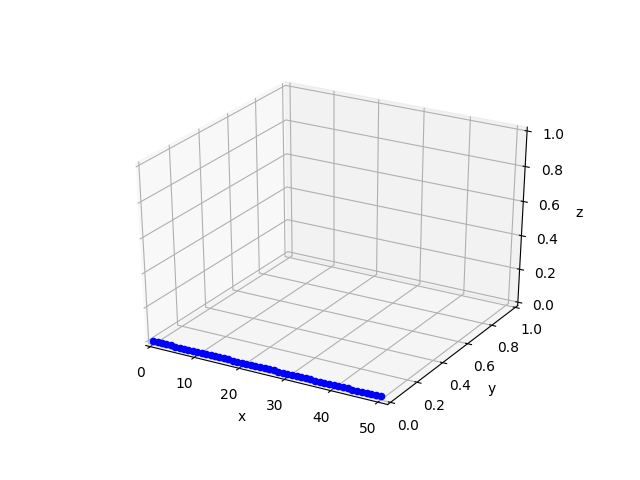

The acutal time is 0.0


<IPython.core.display.Javascript object>


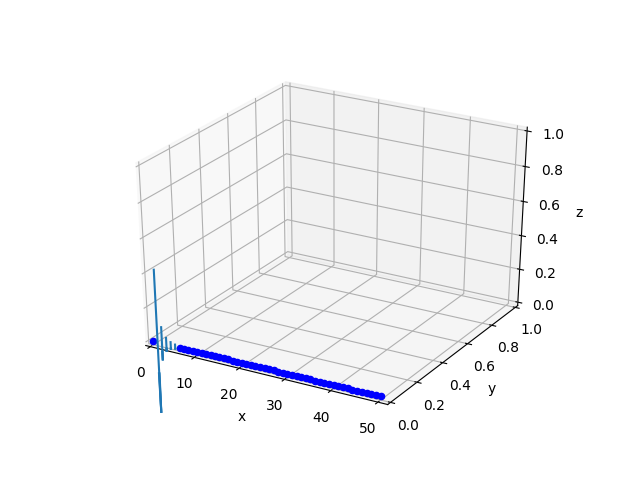

The acutal time is 1.6799999999999998e-08


<IPython.core.display.Javascript object>


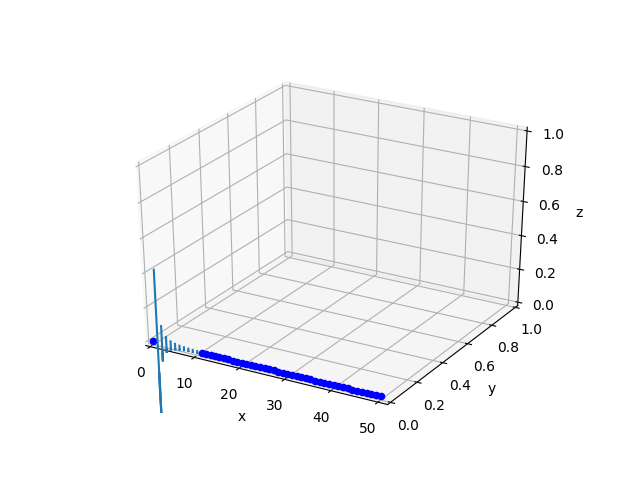

The acutal time is 3.3599999999999996e-08


<IPython.core.display.Javascript object>


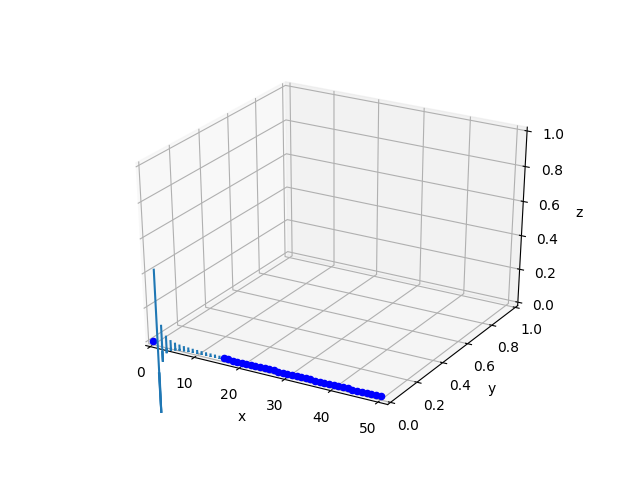

The acutal time is 5.04e-08


<IPython.core.display.Javascript object>


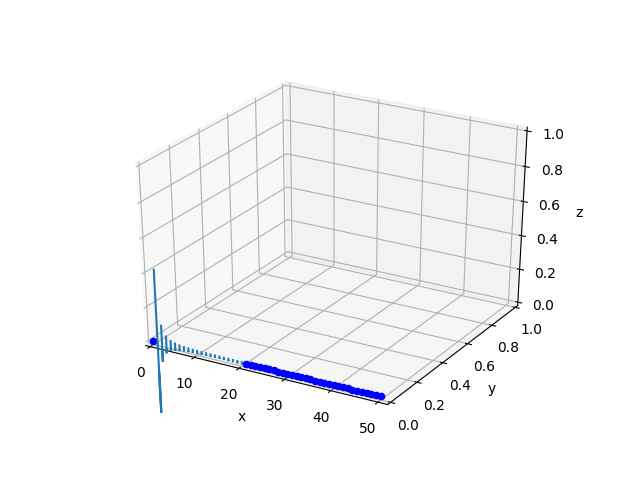

The acutal time is 6.719999999999999e-08


/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/julia/Jefimenko/jefimenko/graphing.py:229: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


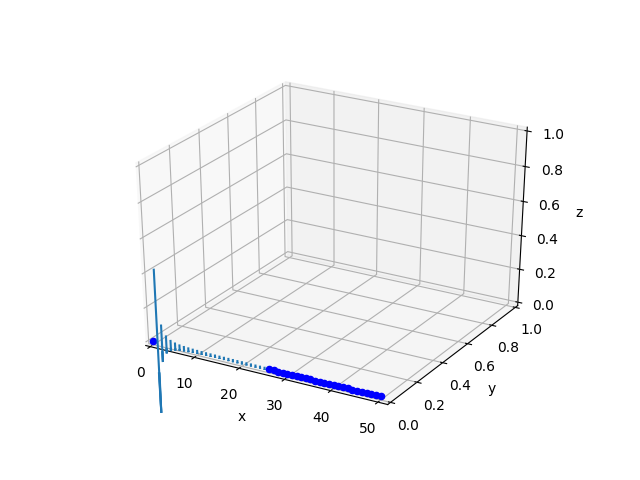

The acutal time is 8.4e-08


<IPython.core.display.Javascript object>


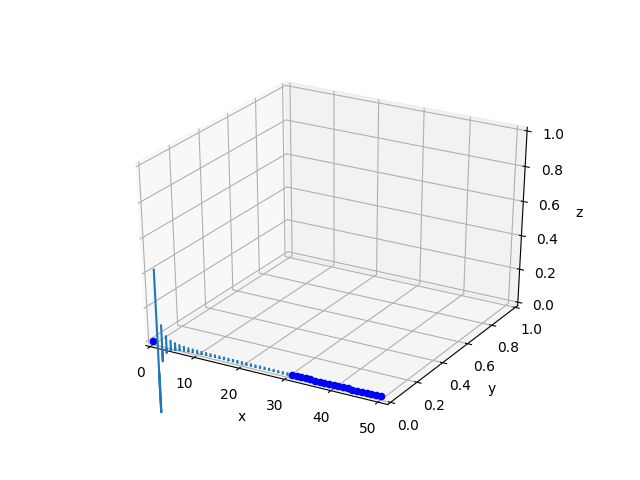

The acutal time is 1.008e-07


<IPython.core.display.Javascript object>


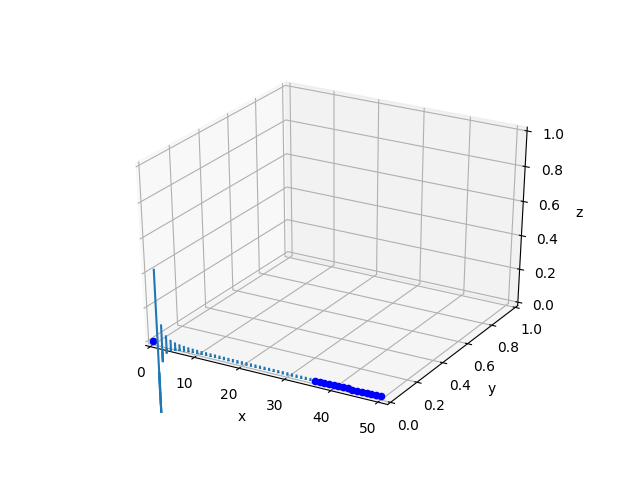

The acutal time is 1.176e-07


<IPython.core.display.Javascript object>


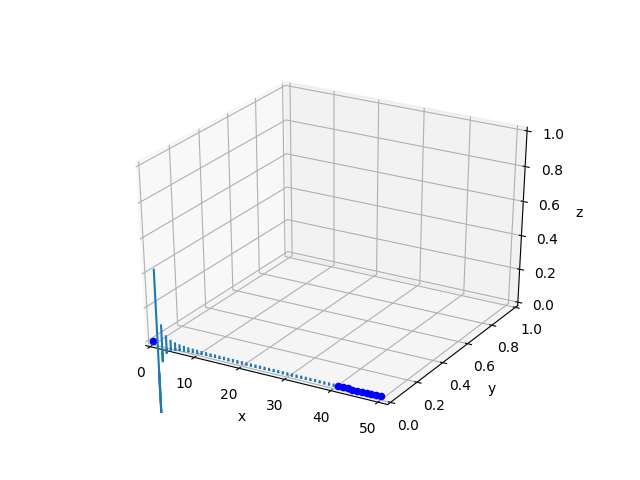

The acutal time is 1.3439999999999999e-07


<IPython.core.display.Javascript object>


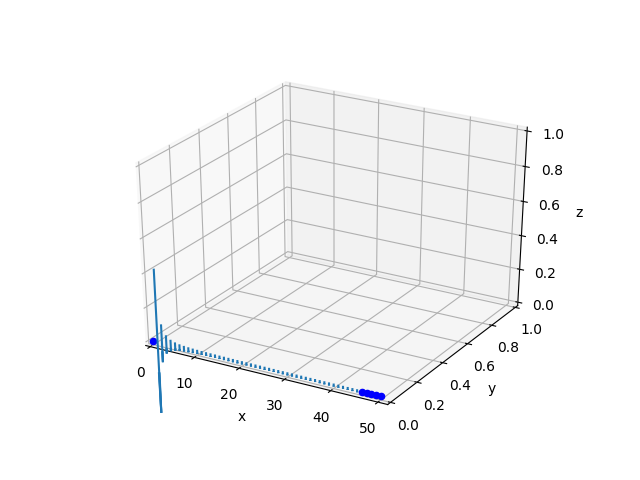

The acutal time is 1.512e-07
Fail
test percent at time t = 45
5.059689676686613
test_array = [0, 4.81433636744912e-10, 0]
 true time = 45 retarded time = 12
H field is = [0.0, 4.5707458872643274e-10, 0.0]
location is 11

Fail
test percent at time t = 45
5.494388826906168
test_array = [0, 4.433440876843762e-10, 0]
 true time = 45 retarded time = 13
H field is = [0.0, 4.1898503966589673e-10, 0.0]
location is 12

Fail
test percent at time t = 45
5.925125443287051
test_array = [0, 4.1111446924853815e-10, 0]
 true time = 45 retarded time = 14
H field is = [0.0, 3.867554212300585e-10, 0.0]
location is 13

Fail
test percent at time t = 45
6.351953461180301
test_array = [0, 3.8348908201781945e-10, 0]
 true time = 45 retarded time = 15
H field is = [0.0, 3.5913003399934e-10, 0.0]
location is 14

Fail
test percent at time t = 45
6.774925841515908
test_array = [0, 3.59547079751197e-10, 0]
 true time = 45 retarded time = 16
H field is = [0.0, 3.351880317327173e-10, 0.0]
location is 15

Fail
test p

Fail
test percent at time t = 45
14.85120102154069
test_array = [0, 1.6402072790711168e-10, 0]
 true time = 45 retarded time = 37
H field is = [0.0, 1.3966167988863223e-10, 0.0]
location is 36

Fail
test percent at time t = 45
5.197076881286047
test_array = [0, 4.687067090770302e-10, 0]
 true time = 45 retarded time = 38
H field is = [0.0, 4.443476610585512e-10, 0.0]
location is 34

Fail
test percent at time t = 45
6.766194324415332
test_array = [0, 3.6001106161821477e-10, 0]
 true time = 45 retarded time = 38
H field is = [0.0, 3.3565201359973574e-10, 0.0]
location is 35

Fail
test percent at time t = 45
9.465188892325596
test_array = [0, 2.5735406124044484e-10, 0]
 true time = 45 retarded time = 38
H field is = [0.0, 2.3299501322196545e-10, 0.0]
location is 36

Fail
test percent at time t = 45
15.201025083458816
test_array = [0, 1.6024608791012115e-10, 0]
 true time = 45 retarded time = 38
H field is = [0.0, 1.3588703989164216e-10, 0.0]
location is 37

Fail
test percent at time t = 4

In [23]:
# %%time

count = test_current_3(print_all=True)
# grid simulated in 0.43078160285949707 seconds without cython

print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))

#test_current_3()

In [24]:
def test_current_4():
    time = 50
    r = 50 * .1

    mapping = jefimenko.Grid(delta=.1,  # this is the size of a step in x, y and z
                             #size=[r + 1],  # this is the size of the grid in meters
                             size=[r+1,.1,.1],  # this is the size of the grid in meters
                             time=(time + 1) * 3.36 * 10**-9 * 10**-1,  # this is the length of a simulation in secounds
                             delta_t=3.36 * 10**-9 * 10**-1  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9 * 10**-1
    mapping.Add_Current([0, 0, 0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time):# + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w), print_all=True)

    jefimenko.simulate(mapping)
    
   # mapping = jefimenko.Grid(3,   # creat a 1D grid
   #             delta=[1, 1, 1],  # this is the size of a step in x, y and z
   #             size=[10, 1, 1],  # this is the size of the grid in meters
   #             time=10 * 3.36 * 10**-9 * 10**-1 ,  # this is the length of a simulation in secounds
   #             delta_t=3.36 * 10**-9 * 10**-1  # this is the size of a full time step
   #     )
   # mapping.Add_Current([0, 0, 0],
   #                 direction=[0, 0, 1],
   #                 #Amps = 5)
   #                 Amps=5/(np.linalg.norm(mapping.delta)))
#
   # jefimenko.plot_grid(mapping)
#
   # U_0 = jefimenko.U_0
#
   # for i in range(len(mapping.currents[0])):
   #     print('amps = ' + str(mapping.currents[0][i].amps))
   #     print('direction = ' + str(mapping.currents[0][i].direction))
   #     print('location = '+ str(mapping.currents[0][i].location))
   #     print('')
   # jefimenko.simulate(mapping)

    return(mapping)

In [25]:
# mapping = test_current_4()
# print_specs(mapping)

notes on test_charge_3
# notice that the t = 8, 27 error seems to be do to a double addition of the field do to the charge 
# on the other hand t =74, 93 seem to be do to a cumpleat miss of of the field at those times
this will need to be fixed although it is not obiveus how

In [26]:
def test_charge_3(print_all=False):
    time_steps = 100
    # time_steps = 200
    delta = [1, 1, 1]
    delta_t=3.36 * 10**-9
    mapping = jefimenko.Grid(delta=delta,  # this is the size of a step in x, y and z in meters
                size=[10, 10, 1],  # this is the size of the grid in meters
                time=time_steps * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=delta_t  # this is the size of a full time step
        )
    
    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
 
    
    q = 1
    mapping.Add_Charge([0, 0, 0], Q = q)

    # v = .1
    v = 10 / time_steps

    #v = .1

    w = 2 * np.pi / time_steps
    for t in range(time_steps):
        mapping.modify_charge(0, t * delta_t, location=[round(t * v,3), 0, 0], print_all=True)
        # print(round(t * v, 3))

    jefimenko.plot_grid(mapping, time=0)
    jefimenko.plot_grid(mapping, time=time_steps - 1)
    
    jefimenko.simulate(mapping)
    
    jefimenko.plot_EM_grid('H', mapping, time=2)
    jefimenko.plot_EM_grid('H', mapping, time=27)


    print(mapping.grid['E'][time_steps - 1][5][5][0])

    test_E_pass_count = 0
    test_E_fail_count = 0
    test_fail_location_E = []
    test_fail_location_H = []
    test_H_pass_count = 0
    test_H_fail_count = 0

    for t in range(time_steps - 6):
        x = 5
        y = 5
        x = 5 - t * v
        R_0 = np.array([x, y, 0])
        r = np.linalg.norm(R_0)
        t_0 = int(t + (r / C_0)/delta_t)
        
        theta = np.arctan2(y, x)

        E_scale = q * (1 - v**2 / C_0**2) / (4 * np.pi * E_0 * r**3 * (1 - (v**2 / C_0**2) * np.sin(theta)**2 )**(3/2)) 
        test_array_E =  E_scale * R_0
        test_array_H = ((E_0) * np.cross(np.array([v, 0, 0]), test_array_E))

        percent_E = abs((np.linalg.norm(mapping.grid['E'][t_0][5][5][0] - test_array_E ) / np.linalg.norm(test_array_E)) * 100)
        percent_H = abs((np.linalg.norm(mapping.grid['H'][t_0][5][5][0] - test_array_H ) / np.linalg.norm(test_array_H)) * 100)

        if percent_E < 5:
            test_E_pass_count +=1
        else:
            test_E_fail_count += 1
            test_fail_location_E.append(t)
        if print_all is True:
            if percent_E > 5:
                print('test percent at time t = ' + str(t))
                print('test array E = ' + str(test_array_E))
                print('simulated E field = ' + str(mapping.grid['E'][t_0][5][5][0]))
                print('percent_E = ' + str(percent_E))
                print('the distince is ' + str(r) )
                if percent_E > 90:
                    print('this one needs fixed')
                print()
    
        if percent_H < 5:  # note H test_array directly calculated from E test array
            test_H_pass_count +=1
        else:
            test_H_fail_count += 1
            test_fail_location_H.append(t)
            if print_all is True:
                print('test percent at time t = ' + str(t))
                print('test array H = ' + str(test_array_H))
                print('simulated H field = ' + str(mapping.grid['H'][t_0][5][5][0]))
                print('percent_H = ' + str(percent_H))
                print('the distince is ' + str(r) )
                print()

    print('E field specs')
    print('test pass count = ' + str(test_E_pass_count))
    print('test fail count = ' + str(test_E_fail_count))
    print('points of failure')
    print(test_fail_location_E)
    print()
    print('H field specs')
    print('test pass count = ' + str(test_H_pass_count))
    print('test fail count = ' + str(test_H_fail_count))
    print('points of failure')
    print(test_fail_location_H)

    if test_H_fail_count == 0:
        print('NOTHING NEEDS FIXED')

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 3.3600000000000004e-07 seconds
each time step will be 3.36e-09
the simulation will be composed of 100 time steps
location
[0.0, 0, 0]
time
0.0
time_step
0
velocity
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]

location
[0.6, 0, 0]
time
2.016e-08
time_step
6
velocity
[[0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.05 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   

 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
charge
1.0

location
[1.1, 0, 0]
time
3.696e-08
time_step
11
velocity
[[0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.05 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.

[2.2, 0, 0]
time
7.392e-08
time_step
22
velocity
[[0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.05 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0. 

[[0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.05 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0. 

acceleration
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.93889390e-18  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.93889390e-18  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17 

 [0.   0.   0.  ]]
acceleration
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.93889390e-18  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.93889390e-18  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]

[5.3, 0, 0]
time
1.7808e-07
time_step
53
velocity
[[0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.

2.1168e-07
time_step
63
velocity
[[0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0

2.4192e-07
time_step
72
velocity
[[0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0

 [0.   0.   0.  ]]
acceleration
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.93889390e-18  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.93889390e-18  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]

 [0.   0.   0.  ]]
acceleration
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.93889390e-18  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.93889390e-18  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]

time_step
93
velocity
[[0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1  0.   0.  ]
 [0.1 

/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/julia/Jefimenko/jefimenko/graphing.py:156: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


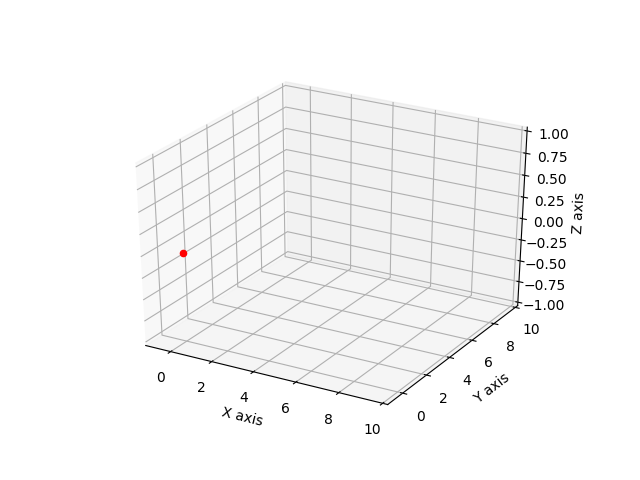

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


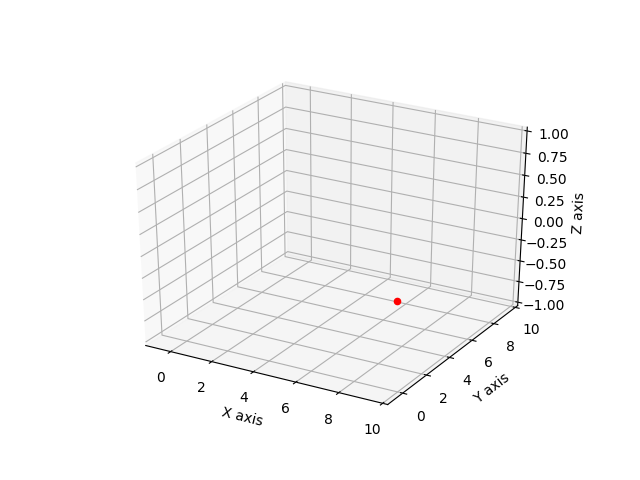

shape = 3
percent compleat = 100 estemated time remaining 0 seconds              


<IPython.core.display.Javascript object>


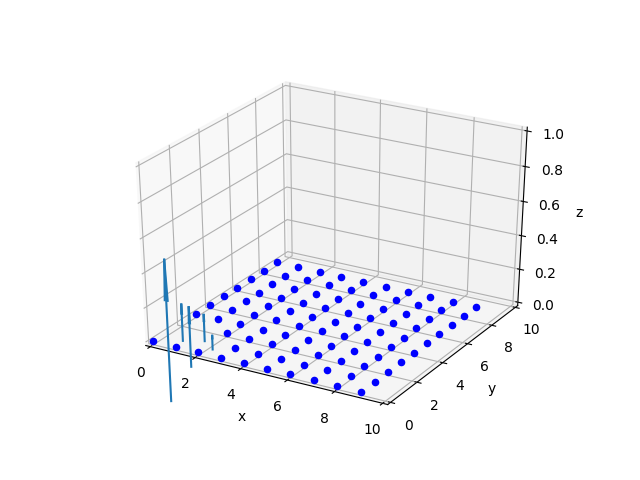

The acutal time is 6.72e-09


<IPython.core.display.Javascript object>


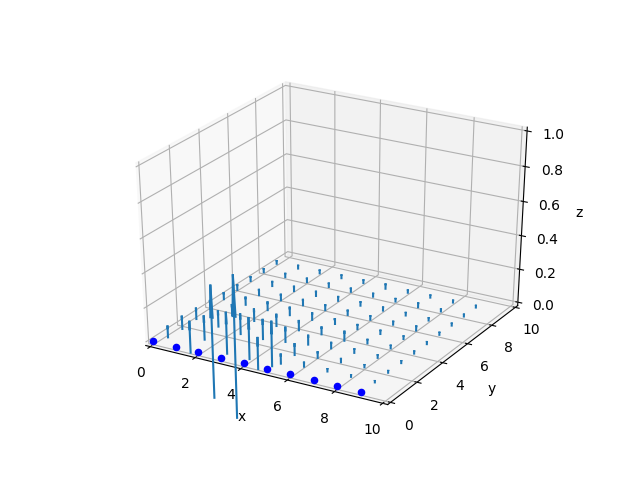

The acutal time is 9.072e-08
[0.0, 0.0, 0.0]
test percent at time t = 8
test array E = [1.35570408e+08 1.61393343e+08 0.00000000e+00]
simulated E field = [270319469.5351745, 318078298.2876765, 0.0]
percent_E = 98.04552779277796
the distince is 6.529931086925803
this one needs fixed

test percent at time t = 8
test array H = [0.        0.        0.0001429]
simulated H field = [0.0, 0.0, 0.0002816324993748171]
percent_H = 97.08266355421505
the distince is 6.529931086925803

test percent at time t = 27
test array E = [1.23999614e+08 2.69564377e+08 0.00000000e+00]
simulated E field = [250436313.12653956, 532974168.486353, 0.0]
percent_E = 98.47204166829086
the distince is 5.503635162326805
this one needs fixed

test percent at time t = 27
test array H = [0.         0.         0.00023868]
simulated H field = [0.0, 0.0, 0.0004719053389718224]
percent_H = 97.71683989008622
the distince is 5.503635162326805

test percent at time t = 74
test array E = [-1.26436700e+08  2.63409791e+08  0.0000000

In [27]:
test_charge_3(print_all=True)

In [28]:
def test_charge_4():
    ''' this is a test partical moving in a circle '''
    time_steps = 150
    delta = [1, 1, 1]
    delta_t = 3.36 * 10**-9
    
    mapping = jefimenko.Grid(delta=delta,  # this is the size of a step in x, y and z in meters
                size=[10, 10, 1],  # this is the size of the grid in meters
                time=time_steps * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    
    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    q = 1
    mapping.Add_Charge([0, 0, 0], Q = q)

    r = 2
    w = 2 * np.pi / time_steps
    for t in range(time_steps):
        #location = r * np.array([np.cos( w * t), np.sin( w * t) , 0]) + np.array([5, 5, 0])
        location = ([r * np.cos( w * t) + 5, r * (np.sin( w * t)) + 5, 0])
        mapping.modify_charge(0, t * delta_t, location=location) 

    jefimenko.plot_grid(mapping, time=0)
    jefimenko.plot_grid(mapping, time=int(time_steps/5))
    jefimenko.plot_grid(mapping, time=int(2*time_steps/5))
    jefimenko.plot_grid(mapping, time=int(3*time_steps/5))
    jefimenko.plot_grid(mapping, time=int(4*time_steps/5))

    test_E_pass_count = 0
    test_E_fail_count = 0
    test_fail_location = []
    test_H_pass_count = 0
    test_H_fail_count = 0

    jefimenko.simulate(mapping)

    for t in range (0, time_steps, int(time_steps / 5)):
        jefimenko.plot_EM_grid('H', mapping, time=t)
    

    print(mapping.grid['E'][time_steps - 1][5][5][0])

    for t in range(time_steps - 2):
        
        t_0 = int(np.rint(t + (r / C_0)/delta_t))
        R_0 = - r * np.array([np.cos(w * t), np.sin(w * t), 0])
        v = w * r
        V_0 = v**2 / r**2 * r * np.array([- np.sin(w * t), np.cos(w * t), 0]) 
    
        test_array_E = (q / (4 * np.pi * E_0 * r**3) * (((1 - v**2 / C_0**2) *
                                                   np.cos(v/C_0) +
                                                   (v / C_0) * np.sin(v / C_0)) * R_0 +
                                                   ((1 - v **2 / C_0**2) * (r / v) *
                                                    np.sin(v / C_0) - r / C_0 *
                                                    np.cos(v / C_0)) * V_0))

        test_array_H = (q / (4 * np.pi * r**3) * v * r * np.array([0, 0, 1]))

        percent_E = abs((np.linalg.norm(mapping.grid['E'][t_0][5][5][0] - test_array_E ) / np.linalg.norm(test_array_E)) * 100)
        percent_H = abs((np.linalg.norm(mapping.grid['H'][t_0][5][5][0] - test_array_H ) / np.linalg.norm(test_array_H)) * 100)

        if percent_E < 5:
            test_E_pass_count +=1
        else:
            test_E_fail_count += 1
            test_fail_location.append(t)
        if percent_E > 5:
            print('test percent at time t = ' + str(t))
            print('test array E      = ' + str(test_array_E))
            print('simulated E field = ' + str(mapping.grid['E'][t_0][5][5][0]))
            print('percent_E = ' + str(percent_E))
            if percent_E > 90:
                print('this one needs fixed')
            print()

        if percent_H < 5:
            test_H_pass_count +=1
        else:
            test_H_fail_count += 1
            test_fail_location.append(t)
            print('note test array directly calculated from E test array')
            print('test percent at time t = ' + str(t))
            print('test array H = ' + str(test_array_H))
            print('simulated H field = ' + str(mapping.grid['H'][t_0][5][5][0]))
            print('percent_H = ' + str(percent_H))
            print()

    print('E field specs')
    print('test pass count = ' + str(test_E_pass_count))
    print('test fail count = ' + str(test_E_fail_count))
    print('points of failer')
    print(test_fail_location)
    print()
    print('H field specs')
    print('test pass count = ' + str(test_H_pass_count))
    print('test fail count = ' + str(test_H_fail_count))
    print('points of failer')
    print(test_fail_location)

    if test_H_fail_count == 0:
        print('NOTHING NEEDS FIXED')

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 5.040000000000001e-07 seconds
each time step will be 3.36e-09
the simulation will be composed of 150 time steps
this is the grid layout


<IPython.core.display.Javascript object>


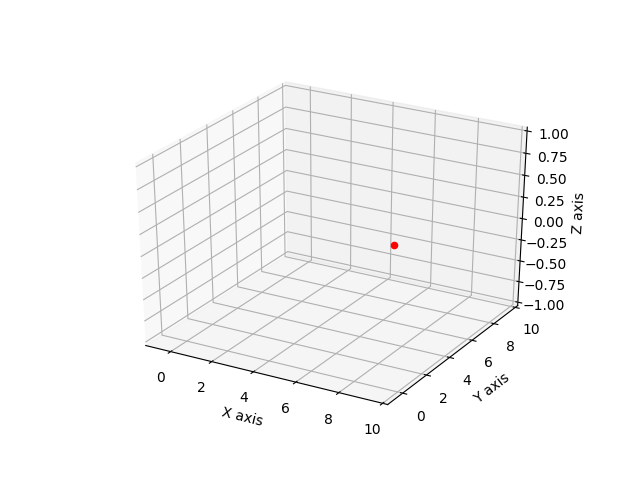

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


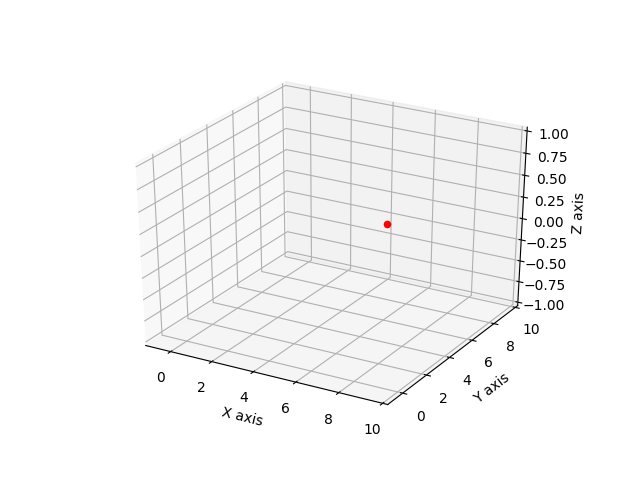

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


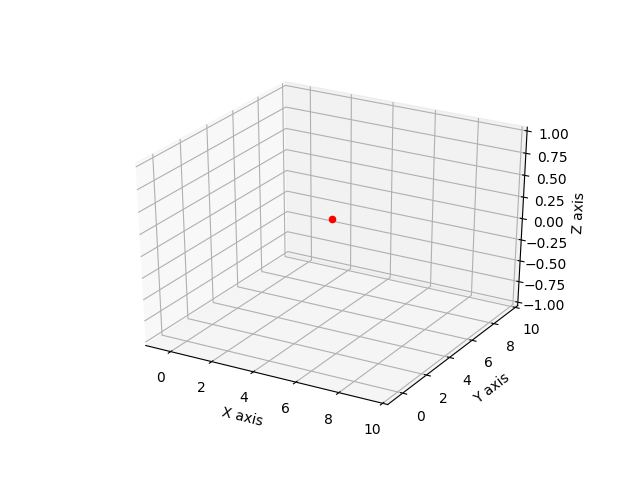

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


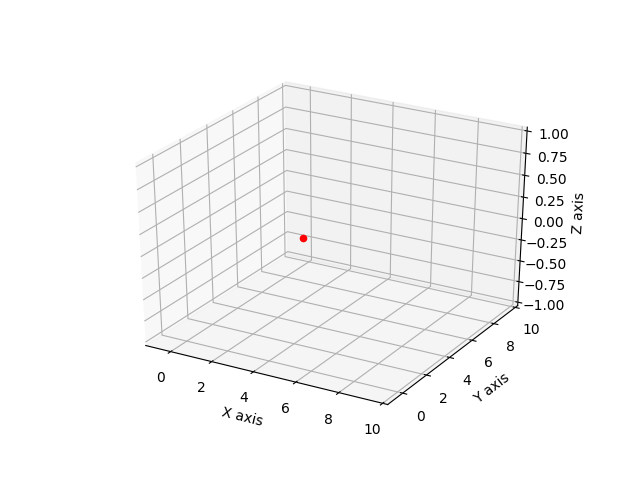

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


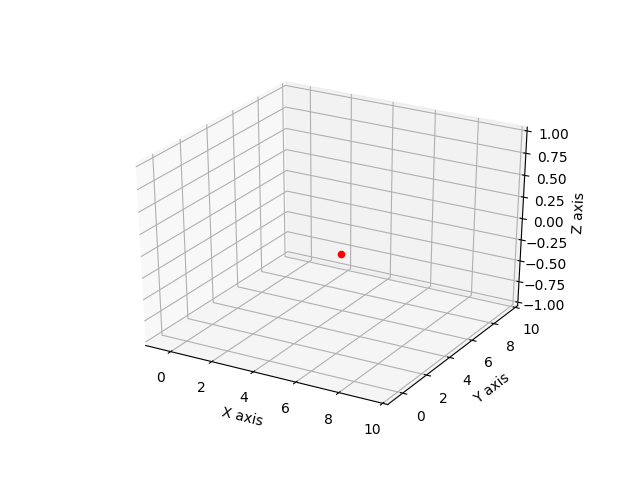

shape = 3
percent compleat = 100 estemated time remaining 0 seconds              


<IPython.core.display.Javascript object>


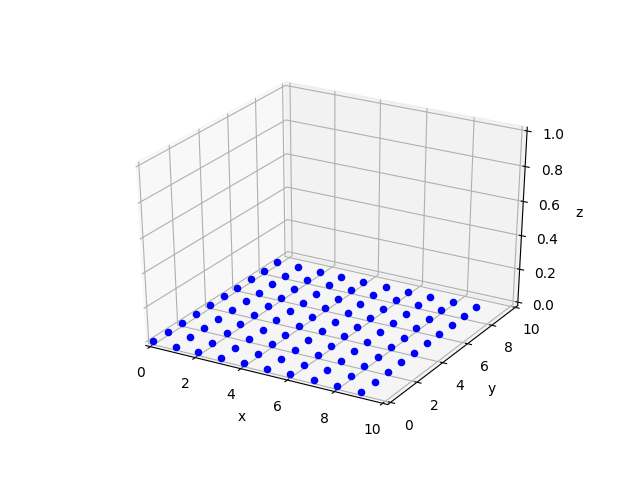

The acutal time is 0.0


<IPython.core.display.Javascript object>


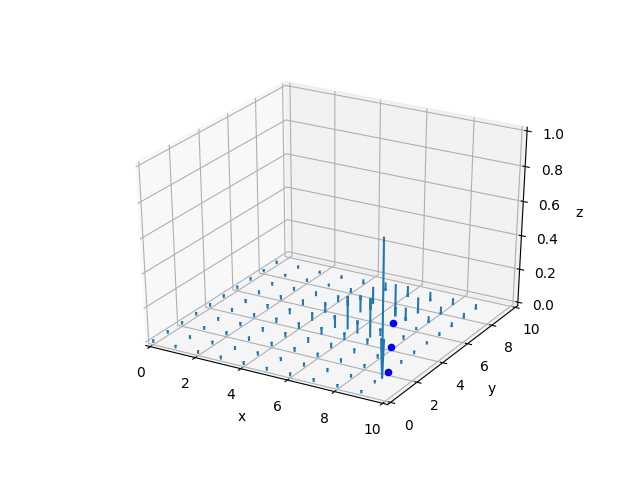

The acutal time is 1.008e-07


<IPython.core.display.Javascript object>


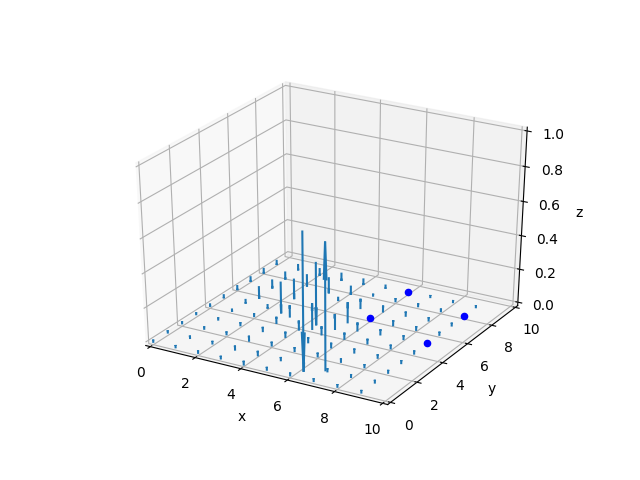

The acutal time is 2.016e-07


<IPython.core.display.Javascript object>


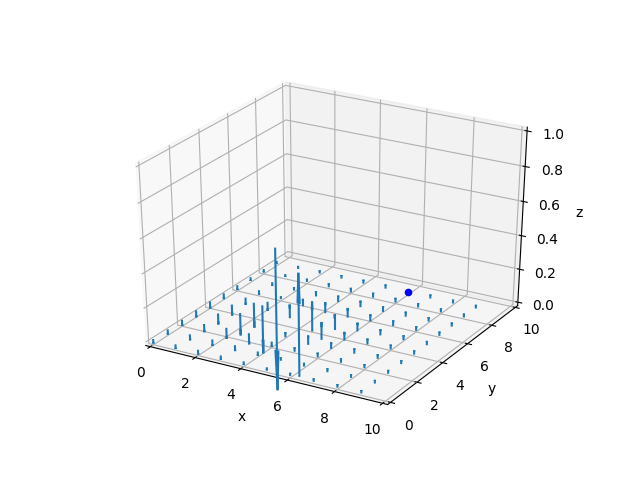

The acutal time is 3.024e-07


<IPython.core.display.Javascript object>


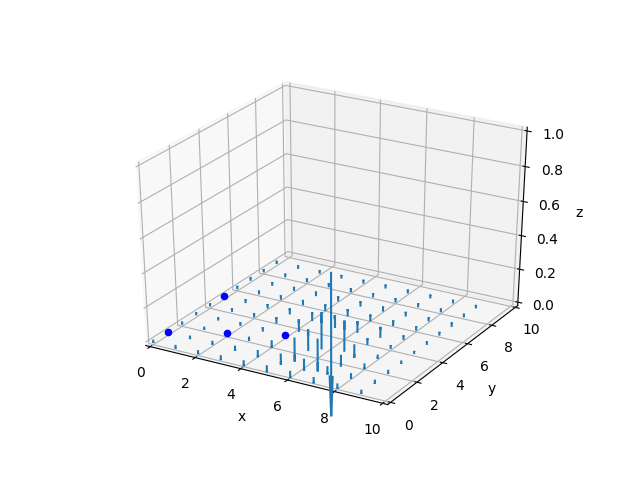

The acutal time is 4.032e-07
[-2244806594.199655, 283585021.14871716, 0.0]
E field specs
test pass count = 148
test fail count = 0
points of failer
[]

H field specs
test pass count = 148
test fail count = 0
points of failer
[]
NOTHING NEEDS FIXED


In [29]:
test_charge_4()

In [30]:
def test_current_5():
    delta = .1
    mapping = jefimenko.Grid(delta=[1 * delta, 1 * delta, 1 * delta],  # this is the size of a step in x, y and z
                size=[11 * delta, 2 * delta, 2 * delta],  # this is the size of the grid in meters
                time=11 * 3.36 * 10**-9  * delta,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9 * delta  # this is the size of a full time step
        )
    mapping.Add_Current([0, 0, 0],
                    direction=[0, 0, 1],
                    Amps=1)

    # jefimenko.plot_grid(mapping)

    U_0 = jefimenko.U_0

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')
    jefimenko.simulate(mapping)


    #print(' The H field is ')
    #for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
    #    jefimenko.plot_EM_grid('H', mapping, time=t)
 
    #print(' The E field is ')
    #for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
    #    jefimenko.plot_EM_grid('E', mapping, time=t)
    
    
    if all([H == T for (H, T) in zip(mapping.grid['H'][0][1][0][0], [0, 0, 0])]):
        print("time == 0 PASS")
    else:
        print("time == 0 Fail")
    test_array = [0, 2*10**-7, 0]

    percent = abs( U_0 * (np.linalg.norm( [H - H_T for (H,H_T) in zip(   
                                mapping.grid['H'][-1][10][0][0], test_array)]) /
                   (np.linalg.norm(test_array))) * 100)

    #percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][-1][10][0][0] - test_array) /
    #               (np.linalg.norm(test_array))) * 100)

    if percent <= 1:
        print("time == 1 R == 1 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 1")
        print("time = 1 FAIL")
        print('H_field is ')
        print(mapping.grid['H'][-1][10][0][0])
        print('target is')
        print(test_array)
        print('')

    test_array = [0, 2*10**-6, 0]
    
    percent = abs( U_0 * (np.linalg.norm( [H - H_T for (H,H_T) in zip(   
                                mapping.grid['H'][-1][-1][0][0], test_array)]) /
                   (np.linalg.norm(test_array))) * 100)

    
#    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][-1][1][0][0] - test_array) /
#                   (np.linalg.norm(test_array))) * 100)

    if percent <= 1:
        print("time == 2 R == 2 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 2 R == 2")
        print("time = 2 FAIL")
        print('H_field is ')
        print(U_0 * mapping.grid['H'][-1][10][0][0])   
        print('target is')
        print(test_array)
        print('')

In [31]:
test_current_5()

the simulaiton is free space True
grid delta array is [0.1, 0.1, 0.1]
the simulaiton will sumulate 3.6960000000000005e-09 seconds
each time step will be 3.3600000000000003e-10
the simulation will be composed of 11 time steps
amps = 1.0
direction = [0, 0, 1]
location = [0, 0, 0]

percent compleat = 100 estemated time remaining 0 seconds              
time == 0 PASS
time == 1 R == 1 PASS
time == 2 R == 2 PASS


In [32]:
def test_boundary_1():        #  this is just a quick test of a static boundary
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                size=[10, 1, 1],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    #  this is just a quick test of a static boundary
    # more is needed including a incoming wave

    #count = mapping.Add_Charge([0], Q = 1, charge_count=True)
    for i in range(10):
        mapping.Add_Boundary(i, [0,0,0], E = [1, 0, 0], H = [0, 0, 0])
 
    
    
   # print("charge_count is " + str(count))
    # jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    # if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
    if all([E == T for (E, T) in zip(mapping.grid['E'][0][1][0][0], [0, 0, 0])]):
        print("time == 0 R == 1 E field PASS")
    else:
        print("time = 0 R == 1 E field FAIL")

    if all([E == T for (E, T) in zip(mapping.grid['H'][0][1][0][0], [0, 0, 0])]):
    # if mapping.grid['H'][0][1][0][0] == [0, 0, 0]:
        print("time == 0 R == 1 H field PASS")
    else:
        print("time == 0 R == 1 H field FAIL")

    test_array = [8987551787.368176, 0, 0]

    if all([ abs(M - T) < .01 for (M, T) in zip(mapping.grid['E'][1][1][0][0], test_array)]):
    #if mapping.grid['E'][1][1][0][0] - test_array < .01:
        percent = (np.linalg.norm(mapping.grid['E'][1][1][0][0] - 8987551787.368176) / 8987551787.368176)
        print("time == 1 R == 1 E filed PASS")
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        print("time == 0 R == 1 E field FAIL")   

    test_array = [2246887946.842, 0, 0]

    if all([ abs(M - T) < .01 for (M, T) in zip(mapping.grid['E'][1][2][0][0], test_array)]):
    #if mapping.grid['E'][1][2][0][0] - test_array < .01:
        print("time == 1 R == 2 E field PASS")
    else:
        print("time == 1 R == 2 E field FAIL")
        print(mapping.grid['E'][1][2][0][0])

    if all([ abs(M - T) < .01 for (M, T) in zip(mapping.grid['H'][1][1][0][0], test_array)]):
    #if mapping.grid['H'][1][1][0][0] == [0, 0, 0]:
        print("time == 1 R == 1 H field PASS")
    else:
        print("time == 1 R == 1 H field FAIL")

In [33]:
''' I am dropping this feture for the time being as the idea was
to use this for finding interfeareance patterns for whitch I do
not bieleve that it is corently or ever was sutible for '''

# test_boundary_1()  # a static boundary

' I am dropping this feture for the time being as the idea was\nto use this for finding interfeareance patterns for whitch I do\nnot bieleve that it is corently or ever was sutible for '

In [34]:
# a dynamic boundary goes here
''' befor i can exspect to do a dynamic boundary I need to devolep a regions calculator'''

' befor i can exspect to do a dynamic boundary I need to devolep a regions calculator'

In [35]:
def test_dipole_1(print_all=False):
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                             size=[7, 7, 1],  # this is the size of the grid in meters
                             time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                             delta_t=3.36 * 10**-9  # this is the size of a full time step
                            )

    count = mapping.Add_Dipole([3, 3, 0], Q = 1, dipole_vector = [1, 0, 0], separation = .01, count=True, print_all=print_all)
    #count = mapping.Add_Dipole([3, 3, 3], Q = 0, dipole_vector = [1, 1, 1], separation = 1, count=True)
    #mapping.Modify_Dipole(N=count, location=[3,3,0], Q=1, dipole_vector=[1, 0, 0], separation=.01,time=0, print_all=True)
    
    if(print_all == True):
        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    dipole_moment = np.array([1, 0, 0]) * 1 * .01

    H_pass_count = 0
    H_fail_count = 0
    for k in range(len( mapping.grid['H'][0] )):
        for j in range(len( mapping.grid['H'][0][1] )):
            for i in range(len( mapping.grid['H'][0][1][0] )):
                if (mapping.grid['H'][-1][k][j][i] == [0,0,0]):
                    H_pass_count = H_pass_count + 1
                else:
                    H_fail_count = H_fail_count + 1

    E_pass_count = 0
    E_fail_count = 0
    for k in range(len( mapping.grid['E'][0] )):
        for j in range(len( mapping.grid['E'][0][1] )):
            for i in range(len( mapping.grid['E'][0][1][0] )):

                R = np.array([3, 3, 0]) - np.array([k, j, i])
                r = np.linalg.norm(R)

                #print('acual result')
                #print(mapping.grid['E'][-1][k][j][i] )
                #print('test_valu')
                #print(dipole_field(r, R, dipole_moment))
                #print('test')
                #print(mapping.grid['E'][-1][k][j][i] - dipole_field(r, R, dipole_moment))

                if np.linalg.norm(mapping.grid['E'][-1][k][j][i] - dipole_field(r, R, dipole_moment)) < np.linalg.norm(mapping.grid['E'][-1][k][j][i]) * .01:
                      E_pass_count = E_pass_count + 1
                elif [k,j,i] != [3, 3, 0]:  # note that [3,3,0] has been left out since it is the location of the dipole
                    E_fail_count = E_fail_count + 1
                    if(print_all == True):
                        print(str(k) + ',' + str(j) + ',' + str(i)  )

    if(print_all == True):
        print('H_pass_count')
        print(H_pass_count)
        print('H_fail_count')
        print(H_fail_count)
        
        print('E_pass_count')
        print(E_pass_count)
        print('E_fail_count')
        print(E_fail_count)
        
    return([E_pass_count, E_fail_count, H_pass_count, H_fail_count])

def dipole_field(r, R, dipole_moment):
    E_0 = (4 * np.pi * 8.9875517873681764 * 10**9 )**-1
    scale = 1 / (4 * np.pi * E_0)
    first_term = ((3 * np.dot(dipole_moment, R)) * R) / r**5
                    
    last_term = dipole_moment / r**3
    #pdb.set_trace()
    
    return(scale * (first_term - last_term))
                    


In [36]:
# %%time
print('test_dipole_1')
# %memit
count = test_dipole_1(print_all = False)
# grid simulated in 0.37735438346862793 seconds without cython

print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))

test_dipole_1
the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 3.36e-08 seconds
each time step will be 3.36e-09
the simulation will be composed of 10 time steps
percent compleat = 100 estemated time remaining 0 seconds              
E pass count = 48
E fail count = 0
H pass count = 49
H fail count = 0


/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in true_divide
/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


In [37]:
def test_dipole_2(print_all=False):

    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                             size=[7, 7, 1],  # this is the size of the grid in meters
                             time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                             delta_t=3.36 * 10**-9  # this is the size of a full time step
                            )

    #count = mapping.Add_Dipole([3, 3, 0], Q = 1, dipole_vector = [1, 0, 0], separation = .01, count=True, print_all=true)
    count = mapping.Add_Dipole([3, 3, 3], Q = 0, dipole_vector = [1, 1, 1], separation = 1, count=True, print_all=print_all)

    if print_all is True:
        print('moddifying dipole')
        print()
    mapping.Modify_Dipole(N=count, location=[3,3,0], Q=1, dipole_vector=[1, 0, 0], separation=.01,time=0, print_all=print_all)
    
    if(print_all == True):
        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    dipole_moment = np.array([1, 0, 0]) * 1 * .01

    H_pass_count = 0
    H_fail_count = 0
    for k in range(len( mapping.grid['H'][0] )):
        for j in range(len( mapping.grid['H'][0][1] )):
            for i in range(len( mapping.grid['H'][0][1][0] )):
                if(mapping.grid['H'][-1][k][j][i] == [0,0,0]):
                    H_pass_count = H_pass_count + 1
                else:
                    H_fail_count = H_fail_count + 1

    E_pass_count = 0
    E_fail_count = 0
    for k in range(len( mapping.grid['E'][0] )):
        for j in range(len( mapping.grid['E'][0][1] )):
            for i in range(len( mapping.grid['E'][0][1][0] )):

                R = np.array([3, 3, 0]) - np.array([k, j, i])
                r = np.linalg.norm(R)

                
                if(print_all == True):
                    print()
                    print('acual result = ' + str(mapping.grid['E'][-1][k][j][i] ))
                    print('target valu  = ' + str((dipole_field(r, R, dipole_moment))))
                    print('test')
                    print(mapping.grid['E'][-1][k][j][i] - dipole_field(r, R, dipole_moment))

                if np.linalg.norm(np.array(mapping.grid['E'][-1][k][j][i]) - np.array(dipole_field(r, R, dipole_moment))) < np.linalg.norm(np.array(mapping.grid['E'][-1][k][j][i]) * .01):
                      E_pass_count = E_pass_count + 1
                elif [k,j,i] != [3, 3, 0]:  # note that [3,3,0] has been left out since it is the location of the dipole
                    E_fail_count = E_fail_count + 1
                    if(print_all == True):
                        print(str(k) + ',' + str(j) + ',' + str(i)  )

    if(print_all == True):
        print('H_pass_count')
        print(H_pass_count)
        print('H_fail_count')
        print(H_fail_count)

        print('E_pass_count')
        print(E_pass_count)
        print('E_fail_count')
        print(E_fail_count)

    return([E_pass_count, E_fail_count, H_pass_count, H_fail_count])

def dipole_field(r, R, dipole_moment):
    E_0 = (4 * np.pi * 8.9875517873681764 * 10**9 )**-1
    scale = 1 / (4 * np.pi * E_0)
    first_term = ((3 * np.dot(dipole_moment, R)) * R) / r**5
                    
    last_term = dipole_moment / r**3
    #pdb.set_trace()
    
    return(scale * (first_term - last_term))
                    


In [38]:
# %%time
print('test_dipole_2')
# %memit
# %lprun 
count = test_dipole_2(print_all = False)

# grid simulated in 0.34521913528442383 seconds without cython

print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))


test_dipole_2
the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 3.36e-08 seconds
each time step will be 3.36e-09
the simulation will be composed of 10 time steps
percent compleat = 100 estemated time remaining 0 seconds              
E pass count = 48
E fail count = 0
H pass count = 49
H fail count = 0


/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in true_divide
/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


In [39]:
def charged_Permittivity_ball():  # this is example 8.7-1 page 251-252
    time = 10
    delta_t=3.36 * 10**-9
    delta = 1
    a = int(7)
    b = int(7)
    c = int(7)
    
    pass_count = 0
    fail_count = 0
    
    mapping = jefimenko.Grid(delta=[delta, delta, delta],  # this is the size of a step in x, y and z
                size=[a * delta, b * delta, c * delta],  # this is the size of the grid in meters
                time=time * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
                free_space = False)

    Q = 1
    a = 3
    
    mapping.Add_Charge([3 ,3 ,3 ],
                       Q=Q)

    C = 299892458
    K_e = 8.9875517872681764 * 10 ** 9
    E_0 = (4 * np.pi * K_e) ** -1
    U_0 = (C ** 2 * E_0) ** -1
    E_1 = 2

    mapping.add_Permittivity([3, 3, 3], permittivity = E_1)

    jefimenko.plot_grid(mapping)

    U_0 = jefimenko.U_0

    jefimenko.simulate(mapping, induction = False)

    # jefimenko.plot_EM_grid('E', mapping, time=time-1)

    #for t in range(time):
    #    print(' E field ' + str(t))
    #    jefimenko.plot_EM_grid('E', mapping, time=t)
        # print(' P_E field ' + str(t))
        # jefimenko.plot_EM_grid('P_E', mapping, time=t)

    a = .5 * delta

    for i in np.ndindex(tuple([5, 5, 5])):

        R = np.array(i) - np.array([3, 3, 3])
        r = np.linalg.norm(R)
        
        if r != 0:
            E_V = Q * R / (4 * np.pi * E_0 * r ** 3)

            E_P = -(E_1 - 1) * Q * R / (4 * np.pi * E_0 * E_1 * r**3)
        else:
            E_V = 0
            E_P = 0
        
        E = E_V + E_P
        
        if np.linalg.norm(1 - (np.linalg.norm(E) / np.linalg.norm(mapping.grid['E'][-1][i[0]][i[1]][i[2]])) < .01):
        #if (E == mapping.grid['E'][-1][i]).all():
            pass_count += 1
        elif (i !=(3, 3, 3)):
            fail_count += 1
            print('fail')
            print(i)
        
        # print('raw electric field is')
        # print(E)
        
       # print('location')
       # print(i)
       # print('radius')
       # print(R)
       # print('target valu')
       # print(E)
       # 
       # print('target without dielectric')
       # print(E_V)
       # print('effect of dielectric')
       # print(E_P)
       # 
       # print('acual valu')
       # print(mapping.grid['E'][-1][i])
       # print('polarization field')
       # # print(mapping.grid['P'][-1][i])
       # 
       # print()
       # # print('total polorization efect')
       # # print(mapping.grid['P_E'][-1][:][0][0])
    
    #print('Pass Count')
    #print(pass_count)
    #print('Fail Count')
    #print(fail_count)


    # return(mapping)
    return(pass_count, fail_count)

the simulaiton is free space False
grid delta array is [1, 1, 1]
the simulaiton will sumulate 3.36e-08 seconds
each time step will be 3.36e-09
the simulation will be composed of 10 time steps
this is the grid layout


<IPython.core.display.Javascript object>


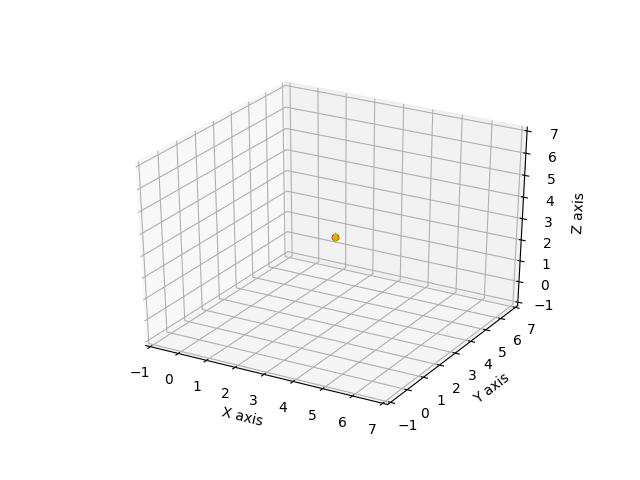

shape = 3
percent compleat = 100 estemated time remaining 0 seconds              
E pass count = 124
E fail count = 0


/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


In [40]:
#%timeit

#%memit

%lprun -f jefimenko.simulate count = charged_Permittivity_ball()
#%lprun -f jefimenko.charge_current_integrals.field_calculator count = charged_Permittivity_ball()
#%lprun -f jefimenko.charge_current_integrals.field_calculator count = charged_Permittivity_ball()
# grid simulated in 42.17354416847229 seconds without cython

print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

#print('H pass count = ' + str(count[2]))
#print('H fail count = ' + str(count[3]))


In [41]:
def plasma_constant_H(print_all=False):
    time_L = 10
    delta_t = .1
    H_field = [0, 0, 1]
    B_z = 1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=[0,0,B_z]
        )
    pass_count = 0
    fail_count = 0
    
    charge = 3.14159 / time_L
    velocity = np.array([1,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    H_field = np.array(H_field)
    jefimenko.plasma_simulation(mapping)
    
    for t in range(int(time_L / delta_t)):
        w_c = charge * B_z / mass
        test_valu_1 = np.cos(w_c * t * delta_t)
        test_valu_2 = -np.sin(w_c * t * delta_t)
        test_valu = np.array([test_valu_1, test_valu_2, 0])
        if print_all == 1:
            print(t)
            print("velocity")
            print(mapping.charges[t][0].velocity)
            print("test velocity")
            print(test_valu)
            # print(np.linalg.norm(mapping.charges[t][0].velocity) / np.linalg.norm(test_valu))
            print(np.abs(test_valu) * .1 )
            print(np.abs(mapping.charges[t][0].velocity - test_valu))
            print((np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ))
            print()

        if (np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ).all():
            pass_count += 1
        else:
            fail_count += 1

    print()
    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))

In [42]:
plasma_constant_H()

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 10 seconds
each time step will be 0.1
the simulation will be composed of 100 time steps
grid simulated in 0.41333556175231934 seconds         nds              


pass count is 99
fail count is 1


In [43]:
def plasma_constant_H_function(print_all=False):
    H_field = lambda location, time: [0, 0, 1]
    time_L = 10
    delta_t = .1
    H_field = [0, 0, 1]
    B_z = 1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=H_field
        )
    pass_count = 0
    fail_count = 0
    
    charge = 3.14159 / time_L
    velocity = np.array([1,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    H_field = np.array(H_field)
    jefimenko.plasma_simulation(mapping)
    
    for t in range(int(time_L / delta_t)):
        w_c = charge * B_z / mass
        test_valu_1 = np.cos(w_c * t * delta_t)
        test_valu_2 = -np.sin(w_c * t * delta_t)
        test_valu = np.array([test_valu_1, test_valu_2, 0])
        if print_all is True:
            print(t)
            print("velocity")
            print(mapping.charges[t][0].velocity)
            print("test velocity")
            print(test_valu)
            # print(np.linalg.norm(mapping.charges[t][0].velocity) / np.linalg.norm(test_valu))
            print('error from test valu')
            print(np.abs(mapping.charges[t][0].velocity - test_valu))
            print((np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ))
            print()

        if (np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ).all():
            pass_count += 1
        else:
            print('Fail at time ' + str(t))
            fail_count += 1

    print()
    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))

In [44]:
plasma_constant_H_function(print_all = False)

the simulaiton is free space True
grid delta array is [1, 1, 1]
the simulaiton will sumulate 10 seconds
each time step will be 0.1
the simulation will be composed of 100 time steps
grid simulated in 0.09586429595947266 seconds         nds              

Fail at time 50

pass count is 99
fail count is 1
